# Исследование объявлений о продаже квартир



## Цель исследования:

Определить факторы, которые влияют на формирование стоимости жилья.


## Ход исследования:

1. Обзор данных. На этом этапе будет проведены обзор и оценка качества данных.
2. Предобработка данных. На этом этапе будет осуществлена проверка данных на ошибки и оценка их влияние на исследование. По-возможности, исправление критичных ошибок данных.
3. Проведение исследовательского анализа для для определения факторов, которые влияют на формирование стоимости жилья.

## Данные
 
Предоставлены сервисом Яндекс Недвижимость: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Данные являются как внесенными пользователем, так и полученные автоматически: на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


## Ознакомление с данными

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.select_dtypes('float')

,last_price,total_area,ceiling_height,floors_total,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.00,2.70,16.0,51.0,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,40.40,NaN,11.0,18.6,11.00,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,5196000.0,56.00,NaN,5.0,34.3,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.00,NaN,14.0,NaN,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.00,3.03,14.0,32.0,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3.70,5.0,73.3,13.83,NaN,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,3100000.0,59.00,NaN,5.0,38.0,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,2500000.0,56.70,NaN,3.0,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,3.00,17.0,NaN,23.30,2.0,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


Рассмотрим общую гистограмму признаков объектов недвижимости.

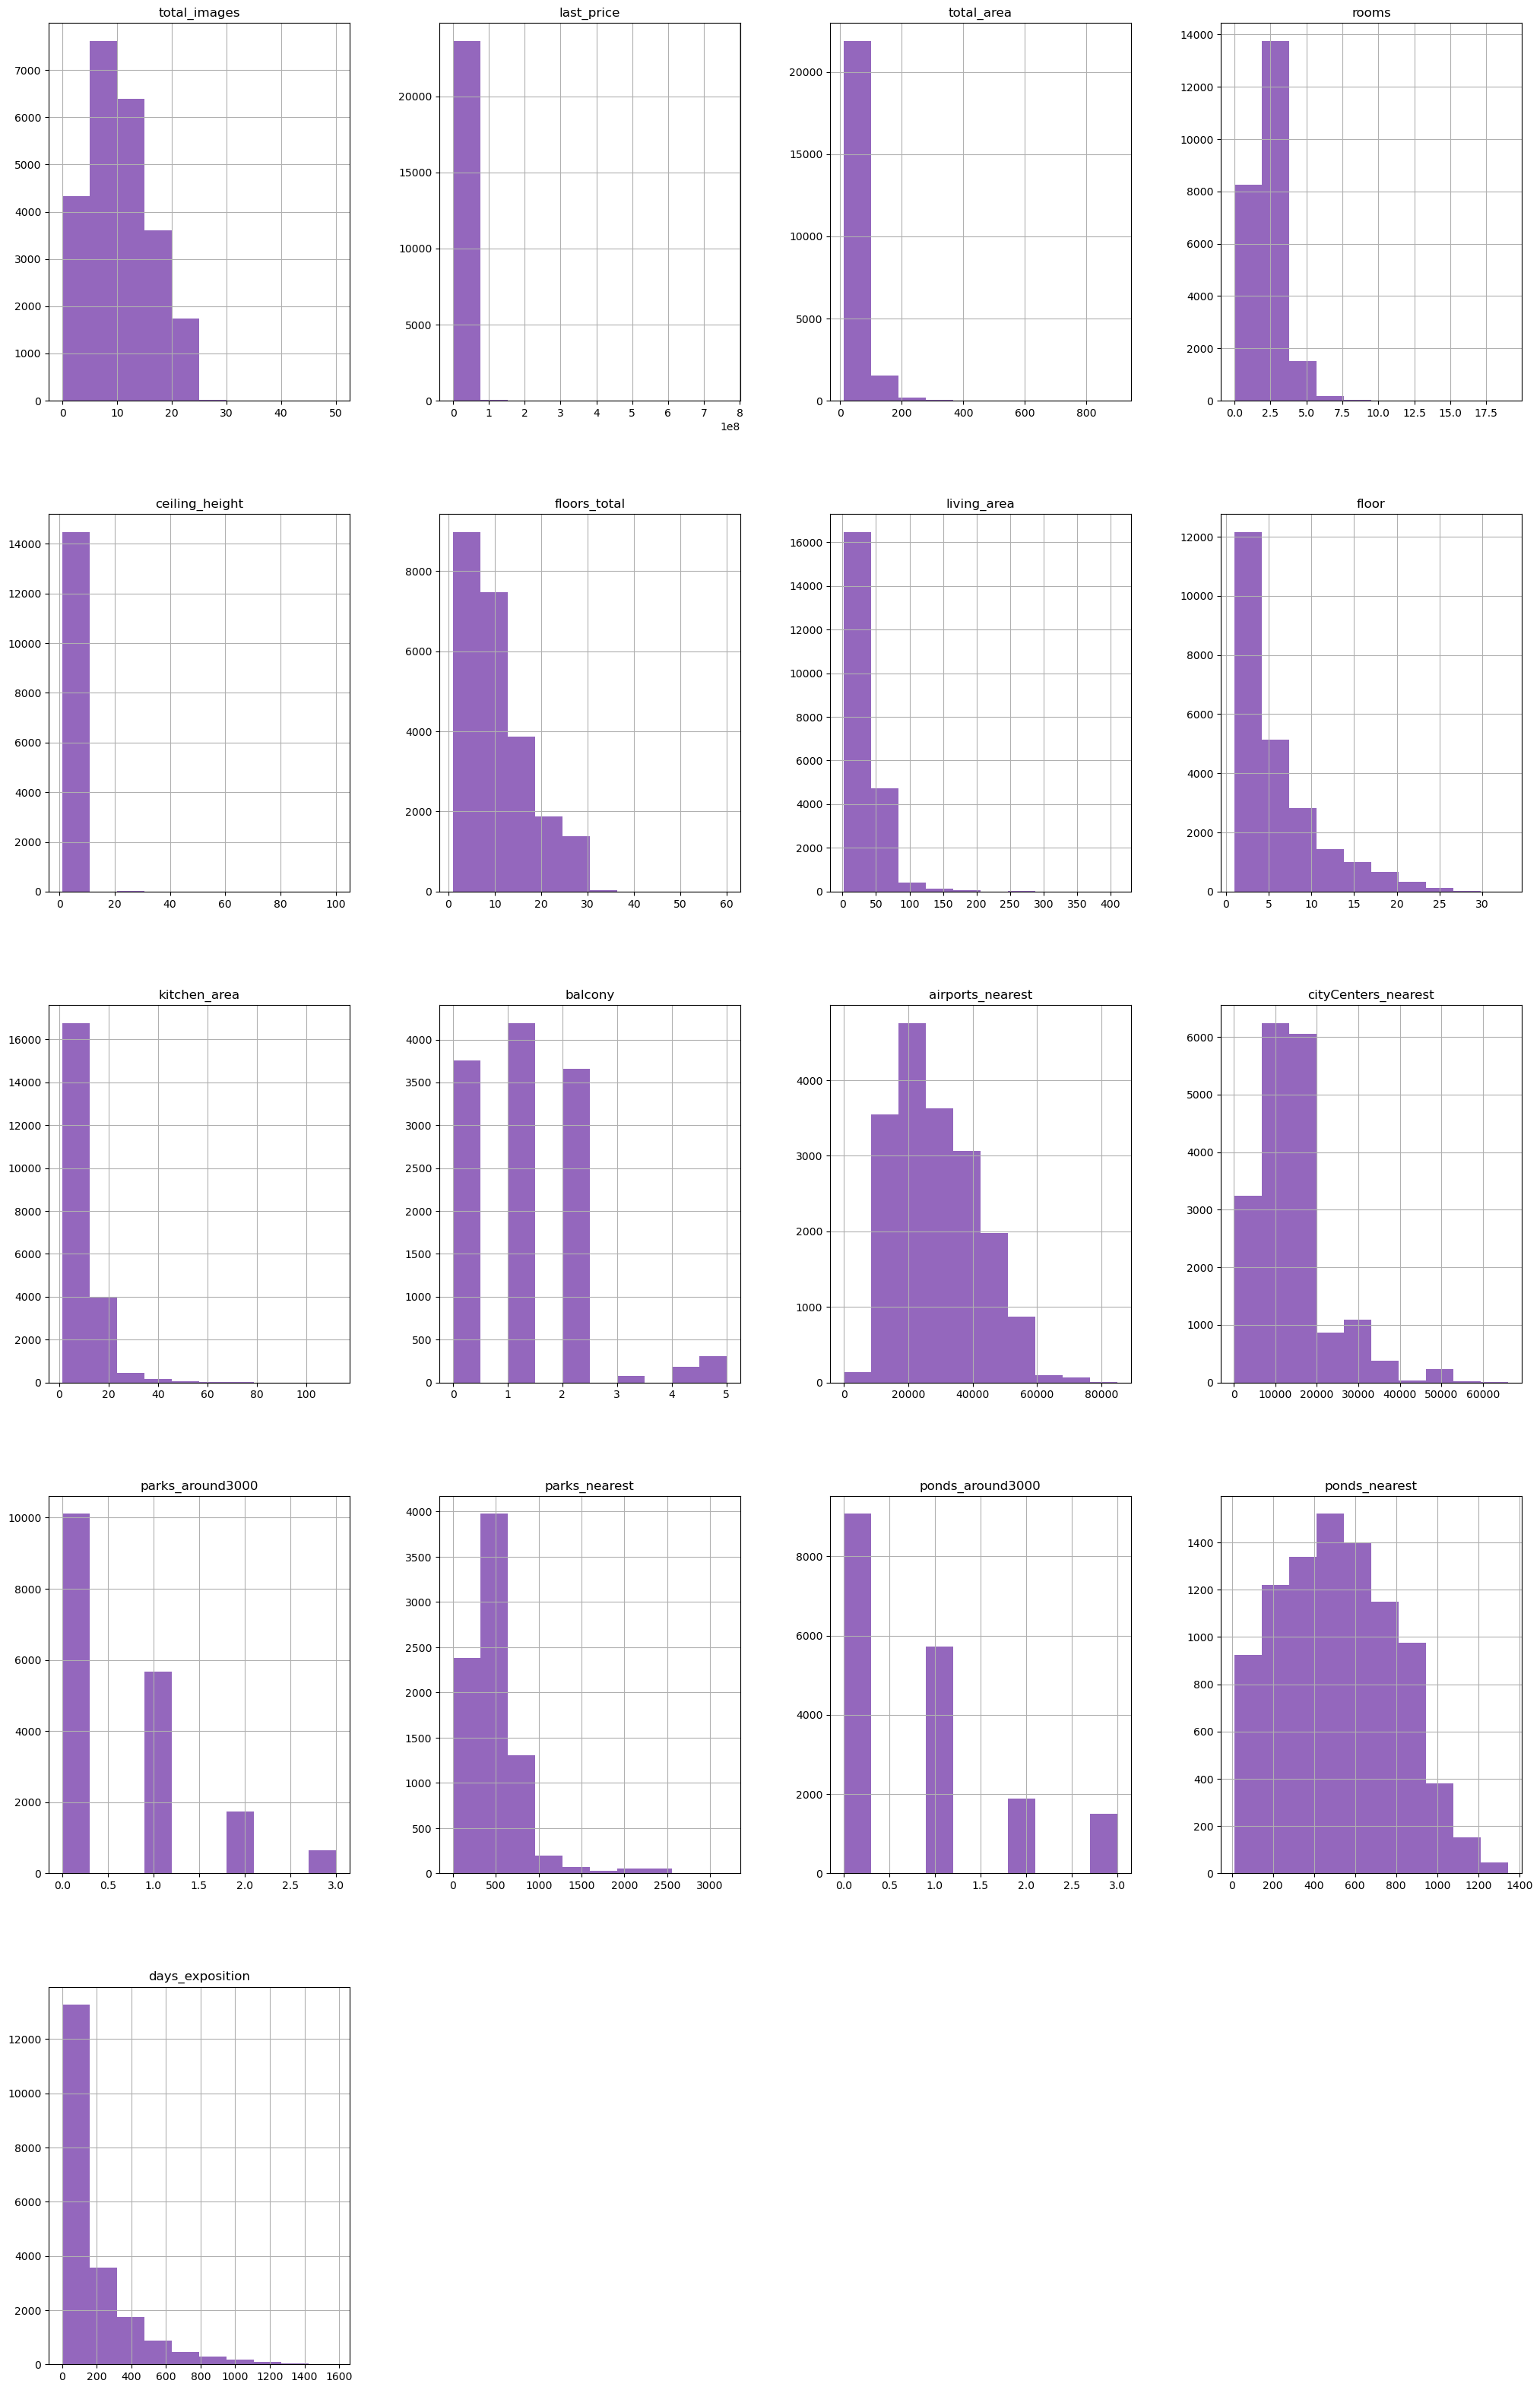

In [6]:
data.hist(figsize=(25, 40), color='tab:purple')
plt.show()


На графиках форма данных представлена лишь приблизительно. 
Из графиков видно, что нет вполне симметричных графиков относительно моды. По всей видимости, наличие аномальных значений и пропуски не позволяют сделать выводы о нормальном распределении данных. Требуется провести предобработку данных.

### Результаты ознакомления с данными
Файл содержит данные по 23699 объектам недвижимости. В 22-х колонках описаны признаки объектов. У некоторых признаков есть пропущенные значения, которые необходимо проанализировать и обработать.

Пропущенные значения и типы данных которые следует проанализировать выявлены в следующих столбцах:
1. first_day_exposition - тип object - должен быть тип datetime
2. last_price - float - для удобства работы тип должен быть int
3. ceiling_height - для некоторых значений отсутствует информация
4. floors_total - для некоторых значений отсутствует информация
5. is_apartment - для некоторых значений отсутствует информация
6. living_area - для некоторых значений отсутствует информация
7. kitchen_area - для некоторых значений отсутствует информация
8. balcony - для некоторых значений отсутствует информация
9. locality_name - для некоторых значений отсутствует информация
10. airports_nearest - для некоторых значений отсутствует информация
11. cityCenters_nearest - для некоторых значений отсутствует информация
12. parks_around3000 - для некоторых значений отсутствует информация
13. parks_nearest - для некоторых значений отсутствует информация
14. ponds_around3000 - для некоторых значений отсутствует информация
15. ponds_nearest - для некоторых значений отсутствует информация
16. days_exposition - тип должен быть int, для некоторых значений отсутствует информация

Ааномальные значения необходимо рассмотреть в следующих колонках:
1. rooms - минимальное значение - 0; максимальное значение - 19;
2. ceiling_height - минимальное значение - 1; максимальное значение - 100;
3. living_area - минимальное значение - 1; максимальное значение - 100;
4. total_area - максимальное значение - 900.


Так как достаточно большое количество столбцов содержит пропущенные данные, потребуется анализ каждого показателя с учетом доли пропущенных значений для конкретной колонки. В зависимости от доли пропусков и природы показателей и возможности сопоставления с иными показателями, будет осуществлены действия, в отношении пропущенных значений: заполнение, удаление или будут оставлены в виде пропусков.


Наличие аномальных значений, типов данных не верного формата свидетельствует о некорректном заполнении данных. Предполагается, что при сборе данных не были установлены четкие категории заполнения, отсутствовали ограничения, возможно, некоторые колонки появились не с момента начала сбора данных.


## Предобработка данных


Рассмотрим долю пропусков в данных по каждому параметру.

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000



Проведем анализ столбцов с выявленными пропусками.

### Анализ пропусков в столбце 'ceiling_height' - высота потолков


Пропущено 38.8% значений в столбце.

Значительное количество пропусков. Можно сделать вывод о том, что данный показатель не является обязательным к заполнению и некоторые пользователи случайно или осознанно не предоставляют данные. Требуется найти способ заполнить пропуски, для дальнейшей работы с данными.

Заменим высоту потолков на медианное занчение относительно месторасположения объекта недвижимости, остальные пропуски заменим на медианное значение в данном столбце.

In [8]:
#замена пропусков на медианное занчение относительно месторасположения объекта недвижимости
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name']==locality_name,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna())&(data['locality_name']==locality_name),'ceiling_height']==median
    
#оставшиеся пропуски заменим на медианное значение в данном столбце
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

In [9]:
# посчитаем количество пропущенных значений после проделанной замены
data['ceiling_height'].isna().value_counts()


False    23699
Name: ceiling_height, dtype: int64

### Анализ пропусков в столбце  'floors_total'- число этажей в доме


Пропущено 0.4% значений в столбце.

Из-за незначительного количества пропусков и отсутствия возможности соотнести с иными данными, принято решение - удалить строки. Пропуски могли возникнуть, так как поле не было обязательным к заполнению, а судя по маленькому проценту пропусков, можно сделать вывод, что пользователь забыл или проскочил этот пункт при заполнении.


In [10]:

data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].isna().value_counts()

False    23613
Name: floors_total, dtype: int64

### Анализ пропусков в столбце  'living_area'- жилая площадь


Пропущено 8.0% значений в столбце.

Почти 8% данных отсутствует, необходимо заполнение пропусков. Пропуски могли возникнуть из-за отсутствия условия обязательного заполнения жилой площади. Помимо этого требуется вести ограничение по минимальному значению жилой площади, в соответствии с установленными нормами.  Пропуски в данных о жилой площади  предлагается заменить на отношение средней жилой площади к жилой площади по строке, для оценки правильности предлагаемого решения построим диаграмму рассеяния "Зависимость жилой площади от общей площади недвижимости".

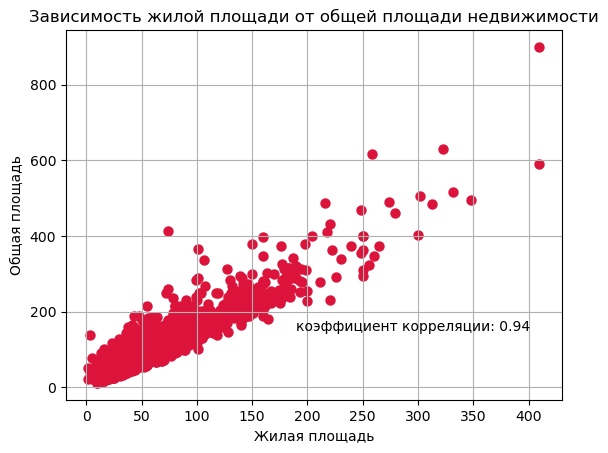

In [11]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True, color='crimson', linewidth=3) 
plt.text(190, 150, 'коэффициент корреляции: ' + str(round(data['living_area'].corr(data['total_area']), 2)))
plt.title('Зависимость жилой площади от общей площади недвижимости')
plt.ylabel('Общая площадь')
plt.xlabel('Жилая площадь')
plt.show()

На диаграмме видно, что коэффициент корреляции Пирсона равен 0,94, что свидетельствует о четкой линейной взаимосвязи общей жилой площади к средней жилой площади, поэтому необходимо заменить пропуски на среднее значение.

In [12]:
mean_living_area = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round((data['total_area']*mean_living_area), 1))
data['living_area'].isna().value_counts()

False    23613
Name: living_area, dtype: int64

### Анализ пропусков в столбце 'kitchen_area'- площадь кухни


Пропущено 9.6% значений в столбце.

Более 9% данных отсутствует, необходимо заполнение пропусков. Может быть несколько причин, связанных с отсутствием данных: отсутствие требования обязательного заполнения, для квартир-студий отсутствует площадь кухни. Пропуски в данных о площади кухни предлагается заменить на отношение средней площади кухни к площади кухни по строке, для оценки правильности предлагаемого решения построим диаграмму рассеяния "Зависимость площали кухни от общей площади".

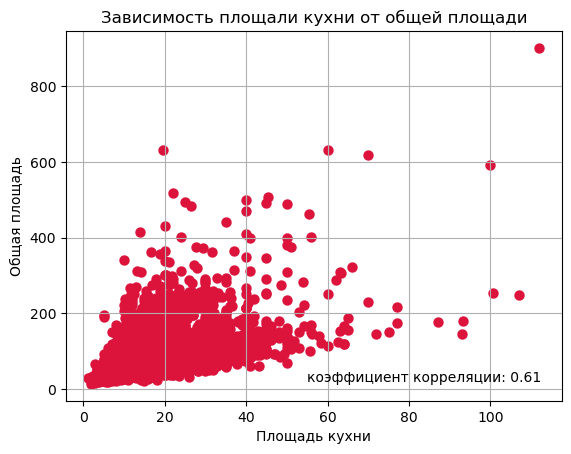

In [13]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True, color='crimson', linewidth=3) 
plt.text(55, 20, 'коэффициент корреляции: ' + str(round(data['kitchen_area'].corr(data['total_area']), 2)))
plt.title('Зависимость площали кухни от общей площади')
plt.ylabel('Общая площадь')
plt.xlabel('Площадь кухни')
plt.show()

На диаграмме видно, что коэффициент корреляции Пирсона равен 0,61, что свидетельствует  о линейной взаимосвязи площали кухни к общей площади, но зависимости не очень сильной. Сначала пропущенные значения площади кухнина в квартирах-студиях заменим на нули "0". Так как предполагается, что для заполнения данных о площади кухни в квартирах-студиях просто не указывали площадь кухни. Для остальных квартир заменим пропуски на средние значение.

In [14]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

Заменим пропущенные значения площади кухни в квартирах-студиях на нули.
Заменим оставшиеся пропуски на средние значение.

In [15]:
mean_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['total_area']*mean_kitchen_area), 1))
data['kitchen_area'].isna().value_counts()

False    23613
Name: kitchen_area, dtype: int64

### Анализ пропусков в столбце 'balcony'- число балконов


Пропущено 48.6% значений в столбце.

Значительное число данных отсутствует в столбце balcony. Можно заключить, что число балконов не заполнялось, если у квартиры не было балкона. На основании этого заполним пропуски: укажем "0".

In [16]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().value_counts()

False    23613
Name: balcony, dtype: int64

### Анализ пропусков в столбце 'locality_name'— название населённого пункта



Пропущено 0.2% значений в столбце.

Количество пропусков незначительное и как-то восстановить данные не предоставляется возможным. Данное поле должно быть обязательным для заполнения, тогда никто не пропустит поле для указания названия населённого пункта. Удалим пропуски.

In [17]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().value_counts()

False    23565
Name: locality_name, dtype: int64

### Анализ пропусков в столбце 'cityCenters_nearest'— расстояние до центра города


Пропущено 23.3% значений в столбце.

Количество пропусков значительное. Если хотим получать данные для каждой позиции недвижимости лучше настроить автоматическое заполнение на основании географических координат недвижимости и координат центра города. Наверное, кому-то сложно дались подобные вычисления, особенно для собственников недвижимости не из Санкт-Петербурга.


Заменим пропуски на медианное значение относительно месторасположения, остальные пропуски оставим без изменения - нет возможности восстановить данные.


In [18]:
#замена пропусков на медианное занчение относительно месторасположения объекта недвижимости
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name']==locality_name,'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna())&(data['locality_name']==locality_name),
             'cityCenters_nearest']==median


In [19]:
data['cityCenters_nearest'].isna().value_counts()

False    18064
True      5501
Name: cityCenters_nearest, dtype: int64

### Анализ пропусков в столбце 'is_apartment'— апартаменты


Пропущено 88.3% значений в столбце.

Значительное количество пропусков. Предполагается, что в данном столбце не указывали данные, если жилье не являлось  аппартаментами. Такое количество могло возникнуть, если столбец "is_apartment" был в таблице не с начала ведения таблицы, а добавили позже (возможно, в нем небыло необходимости, из-за того, что аппартаментов не строили). Пропуски заполним путем указания "False" вместо пропусков.

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().value_counts()

False    23565
Name: is_apartment, dtype: int64

In [21]:
data['is_apartment'].unique()# проверим, какие уникальные значения содержит столбец

array([False,  True])

### Анализ пропусков в столбцах: расстояние до ближайшего аэропорта,  число парков в радиусе 3 км., расстояние до ближайшего парка, число водоемов в радиусе 3 км., расстояние до ближай шего водоема

Рассмотрим число пропусков в столбце - расстояние до ближайшего аэропорта.


Пропущено 23.4% значений в столбце.
    
В соответствии с наименованием населенного пункта укажем медианное значение, остальные пропуски оставим неизменными.

In [22]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name']==locality_name,'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna())&(data['locality_name']==locality_name),'airports_nearest']==median

Рассмотрим число пропусков в столбце - число парков в радиусе 3 км.


Пропущено 23.3% значений в столбце.

Рассмотрим число пропусков в столбце - расстояние до ближайшего парка.


Пропущено 65.9% значений в столбце.

Рассмотрим число пропусков в столбце - число водоемов в радиусе 3 км.


Пропущено 23.3% значений в столбце.

Рассмотрим число пропусков в столбце - расстояние до ближай шего водоема.


Пропущено 61.6% значений в столбце.

При рассмотрении данных показателей, видим, что количество пропусков в данных значительное. 


Для показателя - расстояние до ближайшего аэропорта заполнили часть пропусков медианным значением относительно наименования населенного пункта,  так как наличие аэропорта - это достаточно редкое явление для населенных пунктов в анализируемых данных. 

Для остальных категорий заполнить пропуски не представляется возможным: мы не видим какого-то опроного столбца с полными данными, мы не можем предполагать, что каждый пруд находится в парке, а в каждом парке есть пруд, еще мы видим, что максимальные расстояния до парков и прудов превышают отметки в 3000м. Очевидно, что все эти колонки являюся дополнительными данными, которые в условном тендере при прочих равных дадут приемущество тому или иному виду жилья, но данные колонки не являются чувствительными к иным объектам инфраструктуры. Для некоторых видов жилья расположенных в поселках, деревнях - нет такой инфраструктуры, как аэропорты, парки, пруды. В будущем, для сбора данных по данным категориям лучше ввести возможность выбора указания данных. Например, если при заполнении описанных выше колонок у людей нет ответа ввести категорию " на расстоянии 3000м нет парка/пруда", если люди знают расстояние и оно менее этого числа, то пусть вводят значение вручную, но еще меньше сбоев в сборе данных будет, если создать категории, для выбора расстояния. Для указания количества парков/прудов на расстоянии 3000м сделать категории с числами и заполнение сделать обязательным.

На данный момент пропуски не будут заполнены.

### Анализ пропусков в столбце 'days_exposition'- длительность размещения объявления (от публикации до снятия)


Пропущено 13.4% значений в столбце.

Значительное количество пропусков. Мы видим что разброс данных от 1 до 1580 дней. Возможно, произошел некий сбой в подсчете данного времени, необходимо проверить как происходит начало отсчета, как отсеиваются объявления, которые были созданы случайно и были удалены в течение 1 суток. Проанализировать, какое максимальное количество времени может быть размещено объявление. Посмотреть как происходит подсчет и периодичность подсчета. 

Принимаем решение заполнить пропуски медианными значениями.

In [23]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]
data['days_exposition'].isna().value_counts()

False    23565
Name: days_exposition, dtype: int64

### Замена типа данных

Изменим тип данных в колонках с которыми удалось произвести заполнение пропусков и где изменение типа улучшит читабельность данных.

In [24]:
#Этажи - целые числа
data['floors_total'] = data['floors_total'].astype('int')
#Количество балконов - целые числа
data['balcony'] = data['balcony'].astype('int')
#Количество дней - целые числа
data['days_exposition'] = data['days_exposition'].astype('int')
#Цена на момент снятия с публикации - целые числа
data['last_price'] = data['last_price'].astype('int')
# Тип данных по дате публикации  -  datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Устранение неявных дубликаты в названиях населённых пунктах

После изучения уникальных значений в столбце с названиях населённых пунктов были выявлены дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Появление дубликатов связано с тем, что есть возможность вручную вводить наименования и нет требований к данному полю. Необходимо ограничить возможность свободного ввода данных, а сделать указание путем выбора вида и наименования населенного пункта.


In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
# Посмотрим на количество уникальных значений, включая дубликаты.
len(data['locality_name'].unique())

364

Создадим новый столбец для указания только наименований населенных пунктов и приведем к нижнему регистру все значения.

In [27]:
data['locality_name_short'] = data['locality_name'].str.lower()

In [28]:
delete_words = ['посёлок ','поселок ','посёлок городского типа ','поселок городского типа ','городской посёлок ',\
                'деревня ','садовое товарищество ','село ','городской поселок ',\
                'городской посёлок ','садоводческое некоммерческое товарищество ','посёлок при железнодорожной станции ',\
                'поселок станции ','коттеджный посёлок ','городского типа ','городской ','городского ','при железнодорожной станции ']
name = ''
data['locality_name_short'] = data['locality_name_short'].replace(delete_words,name,regex=True)
data['locality_name_short'].drop_duplicates()

0          санкт-петербург
1                   шушары
5                  янино-1
6                парголово
8                   мурино
               ...        
22938               нижняя
23048    коттеджный лесное
23354            тихковицы
23411       борисова грива
23683         дзержинского
Name: locality_name_short, Length: 309, dtype: object

Теперь в данных с названием населенного пункта отсутствует 55 видов дубликатов.

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,санкт-петербург
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,шушары
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,санкт-петербург
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.8,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,санкт-петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,санкт-петербург


### Устраните редких и выбивающиеся значений

Рассмотрим ceiling_height - высоту потолков(м). Настораживают самые высокие и самые низкие значения высоты потолков по 1 метру и по 100 метров. Очевидно, что сбой в сборе данных произошел из-за отсутствия ограничений по высоте потолков - необходимо ввести такие ограничения.


In [30]:

sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

In [31]:
data = data.query("ceiling_height != [1.0,1.2,100.0]")

Замечены значения, в которых произошел некорректный ввод и необходимо заменить на значения с более правдоподобными данными.

In [32]:
data.loc[data['ceiling_height'] > 20,'ceiling_height'] = data['ceiling_height'] / 10


In [33]:
sorted(data['ceiling_height'].unique())

[1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.9

Рассмотрим значения в столбце total_area - общая площадь квартиры. Можно сказать, что значение равное 900 - это явный выброс. Аномально большое значение могло быть получено из-за отсутствия ограничений по вводу данного параметра. Удаляем строку с этими данными.

In [34]:
sorted(data['total_area'].unique(), reverse=True)

[900.0,
 631.2,
 631.0,
 618.0,
 590.0,
 517.0,
 507.0,
 500.0,
 495.0,
 494.1,
 491.0,
 488.0,
 483.9,
 470.3,
 460.8,
 441.98,
 431.0,
 422.2,
 413.5,
 410.0,
 402.0,
 401.0,
 400.0,
 399.0,
 398.0,
 380.0,
 374.6,
 374.0,
 373.1,
 371.0,
 365.0,
 364.7,
 364.0,
 363.1,
 363.0,
 356.0,
 347.5,
 347.0,
 342.0,
 338.6,
 336.0,
 327.2,
 323.0,
 320.0,
 317.0,
 316.3,
 315.0,
 313.0,
 312.0,
 310.0,
 309.7,
 307.8,
 304.0,
 301.9,
 300.0,
 297.5,
 295.0,
 293.6,
 292.2,
 290.6,
 290.0,
 288.0,
 287.5,
 285.7,
 284.0,
 283.3,
 283.0,
 281.1,
 280.3,
 280.0,
 277.6,
 275.0,
 274.65,
 274.0,
 272.6,
 270.0,
 268.0,
 267.7,
 266.2,
 263.8,
 260.0,
 259.6,
 259.2,
 257.0,
 256.0,
 255.0,
 254.0,
 253.7,
 253.0,
 251.0,
 250.3,
 250.2,
 250.0,
 249.9,
 249.7,
 249.0,
 248.7,
 248.0,
 245.8,
 245.4,
 245.0,
 244.0,
 243.0,
 242.4,
 241.0,
 240.0,
 239.0,
 238.26,
 237.8,
 237.0,
 236.4,
 236.0,
 235.0,
 234.0,
 232.0,
 231.6,
 231.2,
 231.0,
 230.1,
 230.0,
 229.0,
 228.0,
 226.0,
 225.0,
 224.

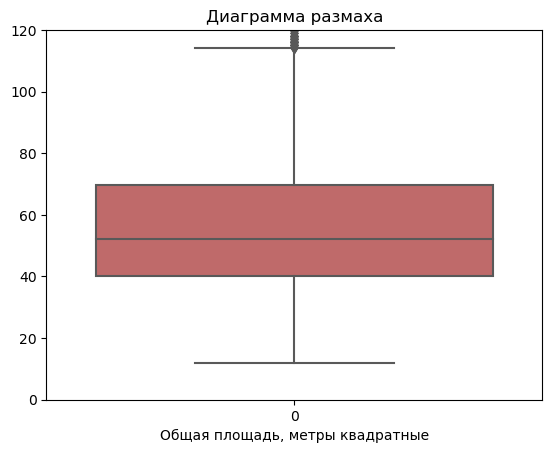

In [35]:
# построим диаграмму размаха
sns.boxplot(data['total_area'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, метры квадратные')
plt.ylim(0, 120)
plt.show()


Согласно диаграмме размаха, более 120 м.кв - это значительные выбросы. Оставим строки только с общей площадью менее 120 м.кв.

In [36]:
data = data.query("total_area < 120")
sorted(data['total_area'].unique(), reverse=True)

[119.8,
 119.7,
 119.6,
 119.5,
 119.3,
 119.0,
 118.9,
 118.7,
 118.5,
 118.3,
 118.2,
 118.0,
 117.7,
 117.6,
 117.44,
 117.4,
 117.3,
 117.2,
 117.1,
 117.0,
 116.8,
 116.7,
 116.6,
 116.5,
 116.3,
 116.2,
 116.0,
 115.9,
 115.8,
 115.7,
 115.6,
 115.5,
 115.4,
 115.3,
 115.28,
 115.2,
 115.1,
 115.0,
 114.8,
 114.6,
 114.55,
 114.5,
 114.4,
 114.3,
 114.2,
 114.1,
 114.0,
 113.9,
 113.6,
 113.5,
 113.3,
 113.2,
 113.1,
 113.0,
 112.9,
 112.7,
 112.6,
 112.5,
 112.4,
 112.3,
 112.2,
 112.1,
 112.0,
 111.9,
 111.8,
 111.5,
 111.4,
 111.3,
 111.0,
 110.8,
 110.6,
 110.5,
 110.4,
 110.2,
 110.1,
 110.0,
 109.8,
 109.7,
 109.4,
 109.3,
 109.2,
 109.1,
 109.0,
 108.9,
 108.8,
 108.7,
 108.6,
 108.5,
 108.4,
 108.3,
 108.1,
 108.0,
 107.9,
 107.8,
 107.7,
 107.6,
 107.5,
 107.4,
 107.3,
 107.2,
 107.1,
 107.0,
 106.9,
 106.8,
 106.7,
 106.5,
 106.4,
 106.3,
 106.2,
 106.0,
 105.7,
 105.6,
 105.5,
 105.4,
 105.34,
 105.3,
 105.2,
 105.1,
 105.0,
 104.9,
 104.8,
 104.7,
 104.66,
 104.6,
 10

Рассмотрим значения в столбце rooms - число комнат. Число комнат может быть равно "0", если речь идет о квартире-студии, но выбиваются высокие значения данного параметра. Предполагается, что нет 19 комнатных квартир и эти данные будут удалены. Если существуют нормы по количеству комнат и по жилой площади, то настроить ограничения по вводу данных.


In [37]:
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7]

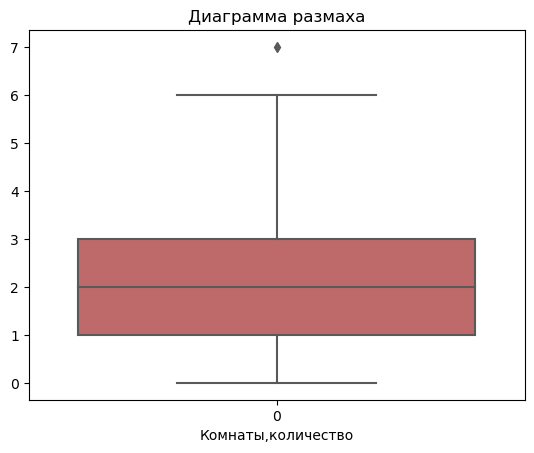

In [38]:
# построим диаграмму размаха
sns.boxplot(data['rooms'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Комнаты,количество')
plt.show()


Согласно диаграмме размаха, что более 7 комнат - это значительные выбросы. Оставим строки только с количеством комнат менее 7.

In [39]:
data = data.query("rooms < 7")

In [40]:
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6]

Рассмотрим столбец с данными living_area - жилая площадь. Нормативными документами установлены значения минимальной жилой площади  - 33(м²), и 18(м²) на каждого дополнительного человека. Если посмотреть данные, то мы видим очень много низких значений. Сложно понять как эти данные преобразовать и принимаем решение не менять из. В будующем необходимо установить некие ограничения по вводу данных или понять, возможно, для некоторых видов жилья нет ограничений и следует как-то отдельно обозначить такие категории жилья.



In [41]:
sorted(data['living_area'].unique())

[2.0,
 3.0,
 5.0,
 5.4,
 6.0,
 6.5,
 7.3,
 7.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.9,
 9.0,
 9.1,
 9.7,
 9.8,
 10.0,
 10.08,
 10.2,
 10.3,
 10.4,
 10.5,
 10.52,
 10.55,
 10.6,
 10.7,
 10.76,
 10.8,
 10.9,
 10.93,
 10.94,
 11.0,
 11.1,
 11.15,
 11.2,
 11.3,
 11.38,
 11.4,
 11.47,
 11.5,
 11.6,
 11.7,
 11.79,
 11.88,
 11.9,
 11.99,
 12.0,
 12.08,
 12.1,
 12.18,
 12.2,
 12.28,
 12.3,
 12.4,
 12.5,
 12.6,
 12.7,
 12.71,
 12.79,
 12.8,
 12.81,
 12.9,
 13.0,
 13.05,
 13.09,
 13.1,
 13.15,
 13.2,
 13.27,
 13.3,
 13.32,
 13.34,
 13.37,
 13.4,
 13.46,
 13.5,
 13.54,
 13.56,
 13.59,
 13.6,
 13.62,
 13.66,
 13.7,
 13.73,
 13.76,
 13.8,
 13.82,
 13.89,
 13.9,
 13.92,
 14.0,
 14.01,
 14.02,
 14.03,
 14.06,
 14.08,
 14.1,
 14.11,
 14.17,
 14.19,
 14.2,
 14.22,
 14.23,
 14.25,
 14.28,
 14.3,
 14.31,
 14.35,
 14.37,
 14.38,
 14.39,
 14.4,
 14.41,
 14.45,
 14.46,
 14.47,
 14.5,
 14.51,
 14.55,
 14.56,
 14.57,
 14.58,
 14.59,
 14.6,
 14.62,
 14.64,
 14.65,
 14.69,
 14.7,
 14.71,
 14.73,
 14.74,
 14.77,
 14.8,
 

In [42]:
data.query("living_area < 18")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,янино-1
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,парголово
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,мурино
14,1,4400000,36.00,2016-06-23,1,2.65,6,17.00,1,False,...,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203,пушкин
17,6,4180000,36.00,2016-09-09,1,2.65,17,16.50,7,False,...,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571,санкт-петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000,35.60,2016-06-23,1,2.50,5,17.00,4,False,...,2,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40,выборг
23685,15,2490000,31.00,2019-01-24,1,2.50,5,17.30,5,False,...,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,95,ломоносов
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29,санкт-петербург
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413,тихвин


### Итоги предобработки

Посмотрим на внешний вид таблицы и информацию о пропусках.

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,санкт-петербург
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,шушары
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,санкт-петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,санкт-петербург
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,янино-1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22470 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22470 non-null  int64         
 1   last_price            22470 non-null  int64         
 2   total_area            22470 non-null  float64       
 3   first_day_exposition  22470 non-null  datetime64[ns]
 4   rooms                 22470 non-null  int64         
 5   ceiling_height        22470 non-null  float64       
 6   floors_total          22470 non-null  int64         
 7   living_area           22470 non-null  float64       
 8   floor                 22470 non-null  int64         
 9   is_apartment          22470 non-null  bool          
 10  studio                22470 non-null  bool          
 11  open_plan             22470 non-null  bool          
 12  kitchen_area          22470 non-null  float64       
 13  balcony         

In [45]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Проверим таблицу на наличие дубликатов. Дубликаты отсутствуют.

In [46]:
data.duplicated().sum()

0

 В результате предобработки данных удалось очистить данные: 
1. Восполненить пропущенных значения в 8 столбцах. Не удалось восполнить пропуски для показателей: расстояние до ближайшего аэропорта,  число парков в радиусе 3 км., расстояние до ближайшего парка, число водоемов в радиусе 3 км., расстояние до ближай шего водоема. При этом, невосполненные пропущенные значения не навредят исследованию основных признаков жилья. 
2. Обнаружены и удалены дубликаты в названиях населенных пунктов.
3. Удалены или преобразованы выбросы - аномальные значения.
<font color='purple'>
4. Выполнена проверка наличия явных дубликатов. Дубликаты отсутствуют.

### Добавим в таблицу новые столбцы

Для проведения исследовательского анализа необходимо дополнить таблицу новыми столбцами со следующими параметрами: 
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления; 
4. год публикации объявления; 
5. тип этажа квартиры (значения — «первый», «последний», «другой»); 
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Цена одного квадратного метра

In [47]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 2)

### День недели публикации объявления

In [48]:
data['weekday'] = data['first_day_exposition'].dt.weekday

### Mесяц публикации объявления

In [49]:
data['month'] = data['first_day_exposition'].dt.month

### Год публикации объявления

In [50]:
data['year'] = data['first_day_exposition'].dt.year

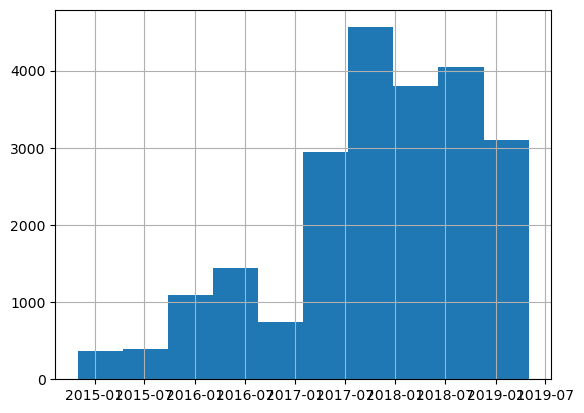

In [51]:
data['mesyac'] = data['first_day_exposition'].astype('datetime64[M]') 
data['mesyac'].hist();

### Тип этажа квартиры

In [52]:
# Все данные сгруппированы в соответствии со значениями:первый, последний, другой.
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

### Расстояние до центра города в километрах

In [53]:
#Необходимо осуществить перевод значений из м в км и округлить до целых значений)
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)


В результате появились необходимые столбцы.

In [54]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_short,price_per_sqm,weekday,month,year,mesyac,floor_category,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,санкт-петербург,120370.37,3,3,2019,2019-03-01,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81,шушары,82920.79,1,12,2018,2018-12-01,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,санкт-петербург,92785.71,3,8,2015,2015-08-01,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,санкт-петербург,100000.00,1,6,2018,2018-06-01,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,55,янино-1,95065.79,0,9,2018,2018-09-01,другой,NaN


## Проведение исследовательского анализа данных

Требуется провести анализ данных:
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

Рассмотрим подробнее каждый признак.

Создадим функцию, определяющую нижнюю и верхнюю границы диапазона данных для задаваемого признака.

In [55]:

def det_whiskers(column):
    """
    Функция получает на вход название признака, и возвращает нижнюю и верхнюю границы диапазона данных
    
    """
    stat = data[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # нижнюю и верхнюю границы диапазона данных   
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # нижняя граница не должна быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # верхняя граница не должена быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

### Жилая площадь

In [56]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('living_area')

[2.0, 72.1]

In [57]:
data['living_area'].describe()

count    22470.000000
mean        31.273482
std         13.622446
min          2.000000
25%         18.600000
50%         29.800000
75%         40.000000
max        101.000000
Name: living_area, dtype: float64

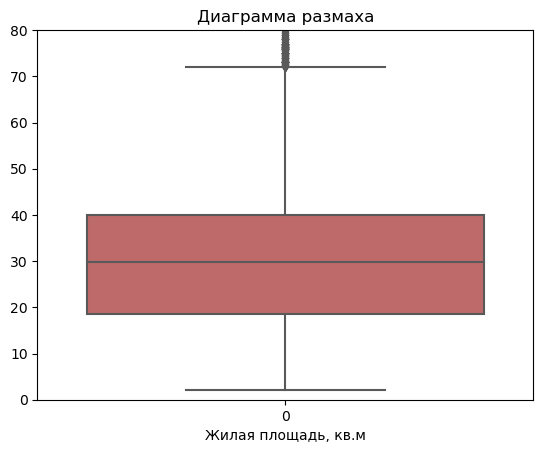

In [58]:
# построим диаграмму размаха, ограничив жилую площадь 80 кв.м
sns.boxplot(data['living_area'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Жилая площадь, кв.м')
plt.ylim(0, 80)
plt.show()

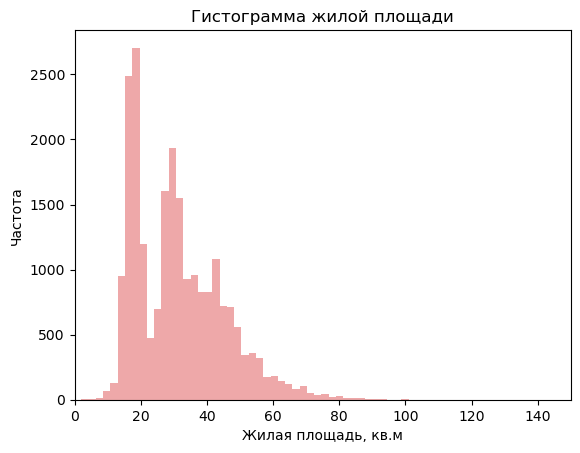

In [59]:
# Построим диаграмму для объектов с площадью менее 150 кв.м.
sns.distplot(data['living_area'], kde=False, bins=45, color='tab:red')
plt.xlim(0, 150)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении показателя жилой площади:
1. 30 м.кв. - самая распространенная жилая площадь квартир;
2. квартиры с жилой площадью от 19 до 40 м.кв. составляют основную массу квартир;
3. аномально низкие и аномально высокие жилые площади - до 2 и от 72 м.кв. соответственно. Здесь есть вопрос и в отношении аномально низких значений - требуется дополнительное исследование, чтобы понять, какие все-таки возможны пределы в указании жилой площади.
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится по центру ящика - показатель того, что данные равномерны;усы длинные и длиннее справа, значит, данные имеют высокое стандартное отклонение. Усы отличаются друг от другада и заметно изменяются в направлении аномально высоких жилых площадей.

#### Площадь кухни

In [60]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('kitchen_area')

[0.55, 17.75]

In [61]:
data['kitchen_area'].describe()

count    22470.000000
mean         9.863617
std          4.492163
min          0.000000
25%          7.000000
50%          9.000000
75%         11.300000
max         64.000000
Name: kitchen_area, dtype: float64

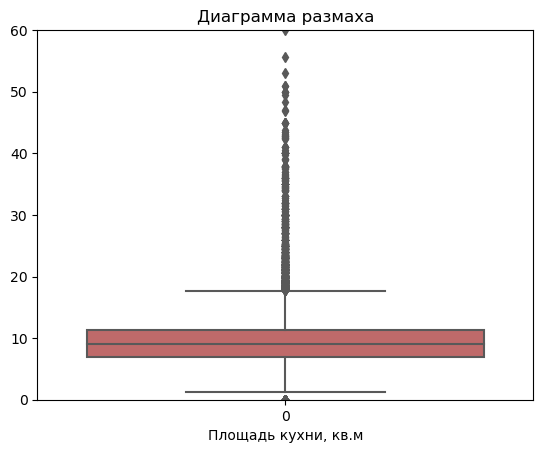

In [62]:
# построим диаграмму размаха, ограничив площадь кухни до 60 кв.м
sns.boxplot(data['kitchen_area'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кухни, кв.м')
plt.ylim(0, 60)
plt.show()

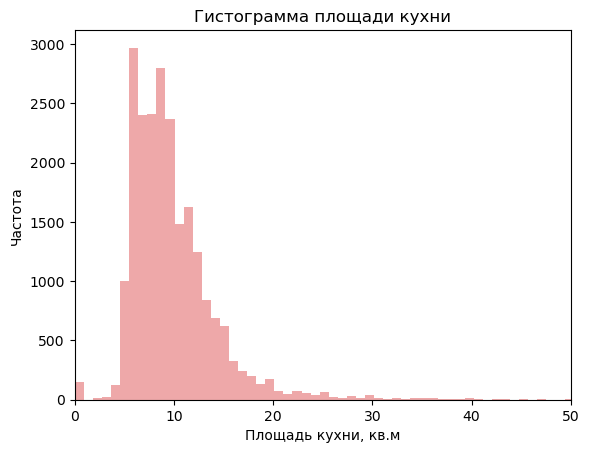

In [63]:
# Построим диаграмму для объектов с площадью кухни менее 150 кв.м.
sns.distplot(data['kitchen_area'], kde=False, bins=70, color='tab:red')
plt.xlim(0, 50)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении показателя площади кухни:
1. 9 м.кв. - такая площадь кузни самая распространенная;
2. основная масса квартир включает кухни с площадью от 7 до 12 м.кв.;
3. аномально высокие значения площади кухни начинаются от 20 м.кв. 
4. данные диаграммы размаха свидетельствуют о следующем:медиана отклонена от центра ящика - показатель того, что данные неравномерны;усы длинные и длиннее справа, значит, данные имеют высокое стандартное отклонение. Усы отличаются друг от другада и заметно изменяются в направлении аномально низких значений площади кухни.

### Цена объекта

In [64]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('last_price')

[12190.0, 10730000.0]

In [65]:
data['last_price'].describe()

count    2.247000e+04
mean     5.365218e+06
std      3.521018e+06
min      1.219000e+04
25%      3.380000e+06
50%      4.500000e+06
75%      6.320000e+06
max      8.200000e+07
Name: last_price, dtype: float64

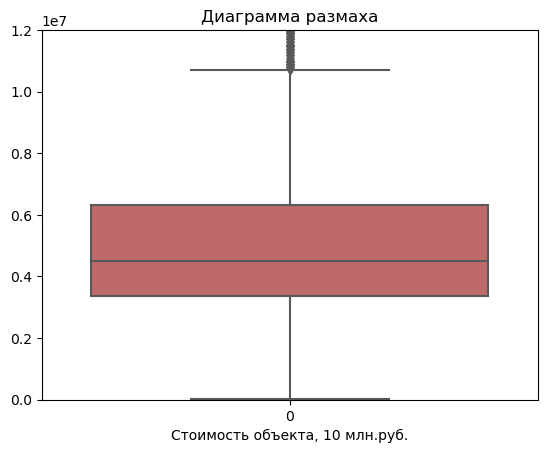

In [66]:
# построим диаграмму размаха, ограничив стоимость объектов 12 млн. рублей
sns.boxplot(data['last_price'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Стоимость объекта, 10 млн.руб.')
plt.ylim(0, 12000000)
plt.show()

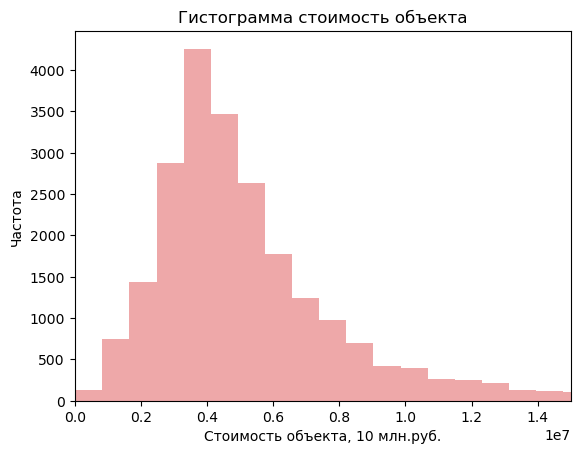

In [67]:
# Построим диаграмму для объектов со стоимостю объектов менее 15 млн. рублей
sns.distplot(data['last_price'], kde=False, bins=100, color='tab:red')
plt.xlim(0, 15000000)
plt.title('Гистограмма стоимость объекта')
plt.xlabel('Стоимость объекта, 10 млн.руб.')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении показателя цены объекта:
1. 4,6 млн.руб. - самая распространенная цена объектов недвижимости;
2. квартиры со стоимостью от 3,4 млн.рублей до 6,8 млн.рублей составляют основную массу квартир;
3. аномально низкие и аномально высокие цены - до 12 тыс.рублей и от 12 млн.рублей соответственно. 
4. данные диаграммы размаха свидетельствуют о следующем:медиана отклонена от центра ящика - показатель того, что данные неравномерны;усы длинные и длиннее справа, значит, данные имеют высокое стандартное отклонение.Усы отличаются друг от другада и заметно изменяются в направлении аномально низких значений стоимости жилья.

### Количество комнат

In [68]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('rooms')

[0.0, 6.0]

In [69]:
data['rooms'].describe()

count    22470.000000
mean         1.958166
std          0.906572
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

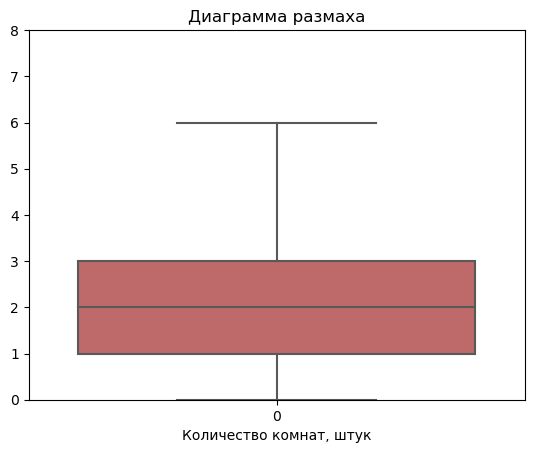

In [70]:
# построим диаграмму размаха, ограничив количество комнат до 8
sns.boxplot(data['rooms'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Количество комнат, штук')
plt.ylim(0, 8)
plt.show()

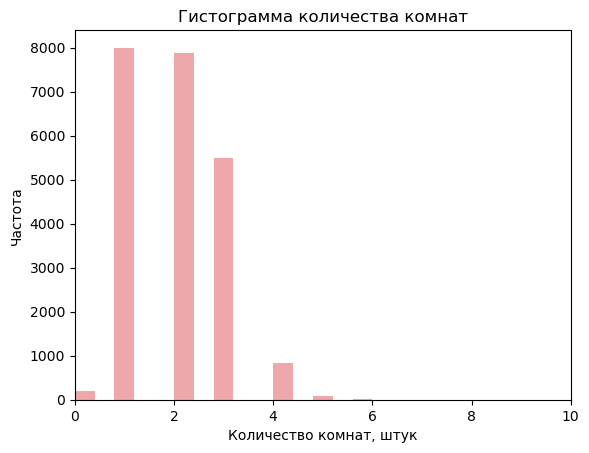

In [71]:
# Построим диаграмму для объектов с количеством комнат менее 10 
sns.distplot(data['rooms'], kde=False, bins=15, color='tab:red')
plt.xlim(0, 10)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат, штук')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении количества комнат:
1. 2-х комнатная квартира - самая распространенная среди объектов недвижимости;
2. квартиры с количеством комнат от 1 до 3-х составляют основную массу квартир;
3. аномально большое количество комнат начинается с 6 штук. 
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится по центру ящика - показатель того, что данные равномерны;усы длинные и длиннее справа, значит, данные имеют высокое стандартное отклонение. Усы отличаются друг от другада и заметно изменяются в направлении аномально маленького количества комнат.

### Высота потолков

In [72]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('ceiling_height')

[2.45, 2.85]

In [73]:
data['ceiling_height'].describe()

count    22470.000000
mean         2.684204
std          0.254025
min          1.750000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

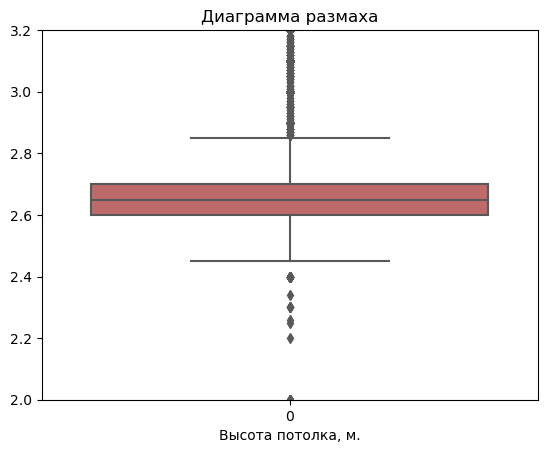

In [74]:
# построим диаграмму размаха, ограничив высоту потолков от 2 до 3,2 м.
sns.boxplot(data['ceiling_height'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолка, м.')
plt.ylim(2, 3.2)
plt.show()

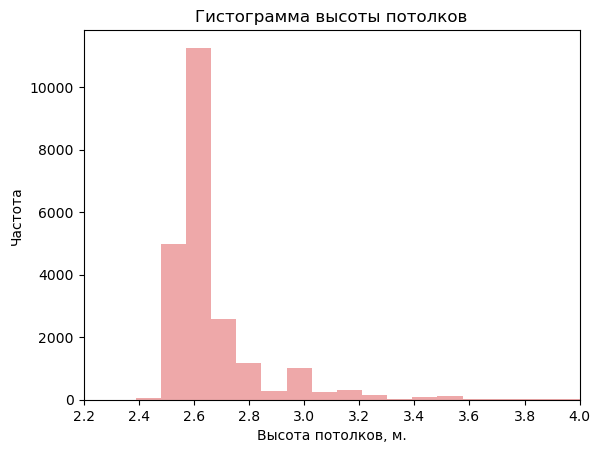

In [75]:
# Построим диаграмму для объектов с высотой потолка от 2,2 до 4 м.
sns.distplot(data['ceiling_height'], kde=False, bins=200, color='tab:red')
plt.xlim(2.2, 4)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении высоты потолков:
1. 2,65 метров - самая распространенная высота потолков среди объектов недвижимости;
2. квартиры c высотой потолков от 2,55 до 2,75 метров составляют основную массу квартир;
3. аномально большая высота потолков начинается с высоты более 3-х метров.
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится по центру ящика - показатель того, что данные равномерны; усы длинные но одинаковой длины, значит, данные имеют высокое стандартное отклонениеб нет смещения к нижним или верхним значениям.

### Этаж квартиры

In [76]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('floor')

[1.0, 17.0]

In [77]:
data['floor'].describe()

count    22470.000000
mean         5.902003
std          4.898881
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

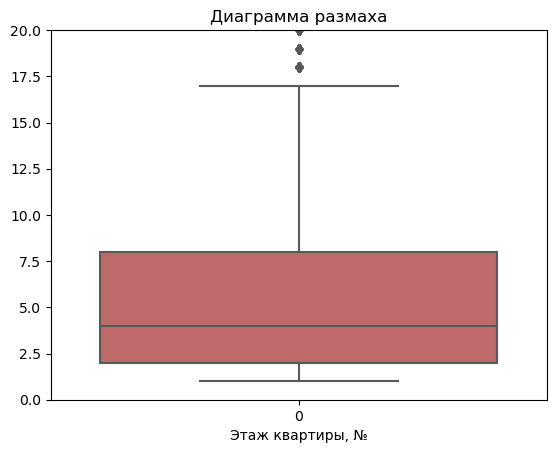

In [78]:
# построим диаграмму размаха, ограничив квартирами на 20 этаже.
sns.boxplot(data['floor'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Этаж квартиры, №')
plt.ylim(0, 20)
plt.show()

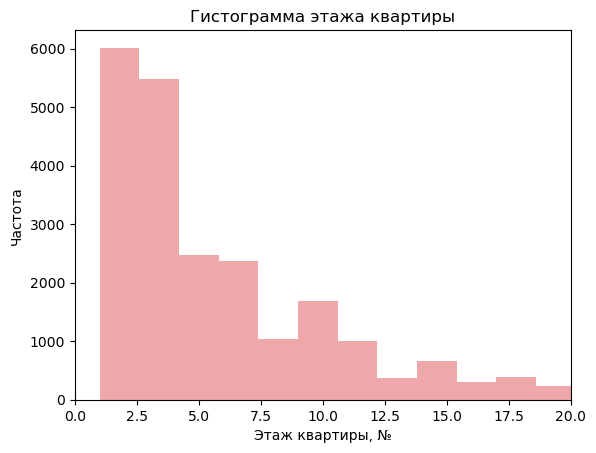

In [79]:
# Построим диаграмму для объектов находящихся е вше 20 этажа.
sns.distplot(data['floor'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 20)
plt.title('Гистограмма этажа квартиры')
plt.xlabel('Этаж квартиры, №')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении этажа квартиры:
1. 4 этаж - самый распространенный этаж среди объектов недвижимости;
2. квартиры, находящиеся со 2 по 8 этажи, составляют основную массу квартир;
3. аномально большой номер этажа начинается с 18 этажа.
4. данные диаграммы размаха свидетельствуют о следующем:медиана смещена к левому краю ящика - показатель того, что данные неравномерны ; усы длинные справа данные имеют высокое стандартное отклонение, есть смещение значений к нижним границам.

### Тип этажа квартиры («первый», «последний», «другой»)

Найдем количество значений в каждой категории квартир.

In [80]:
data.floor_category.value_counts()


другой       16538
последний     3124
первый        2808
Name: floor_category, dtype: int64

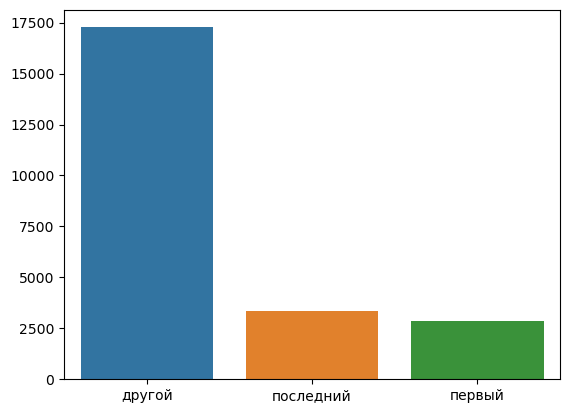

In [81]:
x = ['другой', 'последний', 'первый']
y = [17272, 3349, 2879]

sns.barplot(x=x, y=y);

По представленным данным можно сделать следующие выводы в отношении nbgf типа этажа квартиры:
1. Максимальное количество квартир относится к категории "другой" этаж.
2. Меньше всего количество квартир в категории "первый" этаж.


### Общее количество этажей в доме

In [82]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('floors_total')

[1.0, 32.5]

In [83]:
data['floors_total'].describe()

count    22470.000000
mean        10.788206
std          6.633837
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

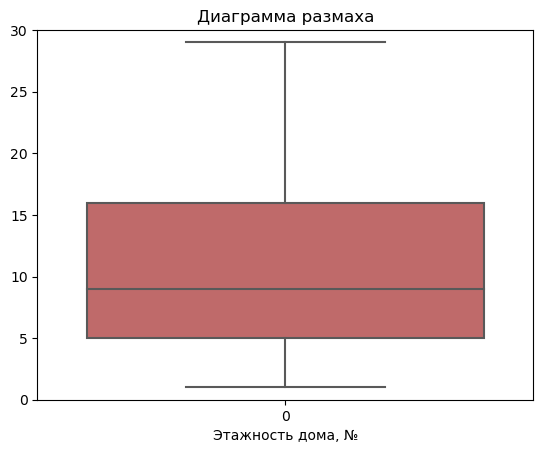

In [84]:
# построим диаграмму размаха, ограничив этажность дома 30-ю этажами.
sns.boxplot(data['floors_total'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Этажность дома, №')
plt.ylim(0, 30)
plt.show()

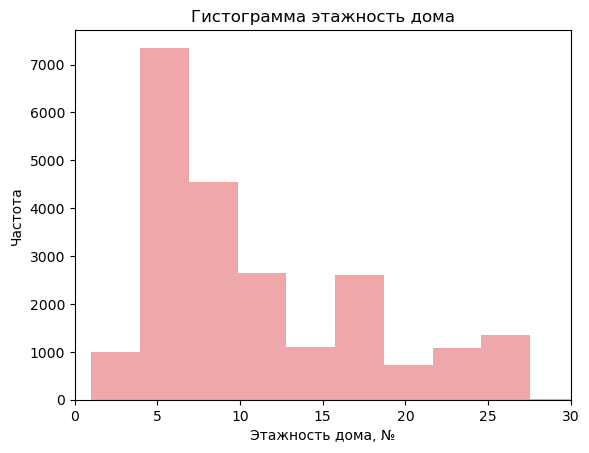

In [85]:
# Построим диаграмму для домов высотой не вше 30-и этажей.
sns.distplot(data['floors_total'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 30)
plt.title('Гистограмма этажность дома')
plt.xlabel('Этажность дома, №')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении этажа квартиры:
1. 9 этажный дом - самый распространенный по высоте объектов недвижимости;
2. квартиры, находящиеся в домах с этажностью от 5 до 16 этажей, составляют основную массу квартир;
3. аномально высотные дома начинается с 18 этажа.
4. данные диаграммы размаха свидетельствуют о следующем:медиана смещена к левому краю ящика - показатель того, что данные неравномерны ; усы длинные справа данные имеют высокое стандартное отклонение, есть смещение значений к нижним границам.

### Расстояние до центра города в метрах

In [86]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('cityCenters_nearest')

[322.0, 26154.0]

In [87]:
data['cityCenters_nearest'].describe()

count    17005.000000
mean     14582.495501
std       8522.733384
min        208.000000
25%      10009.000000
50%      13330.000000
75%      16467.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

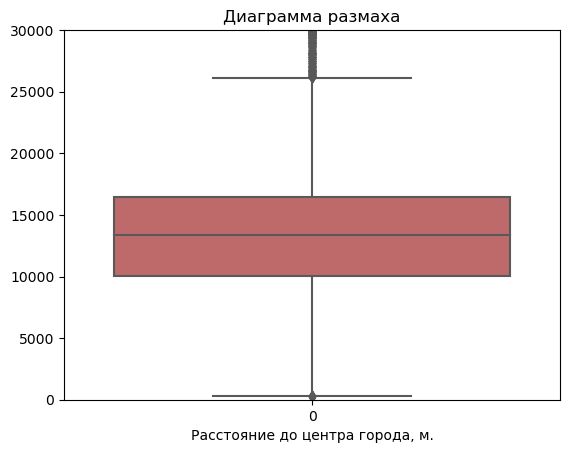

In [88]:
# построим диаграмму размаха, ограничив Расстояние до центра города 30-ю километрами.
sns.boxplot(data['cityCenters_nearest'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до центра города, м.')
plt.ylim(0, 30000)
plt.show()

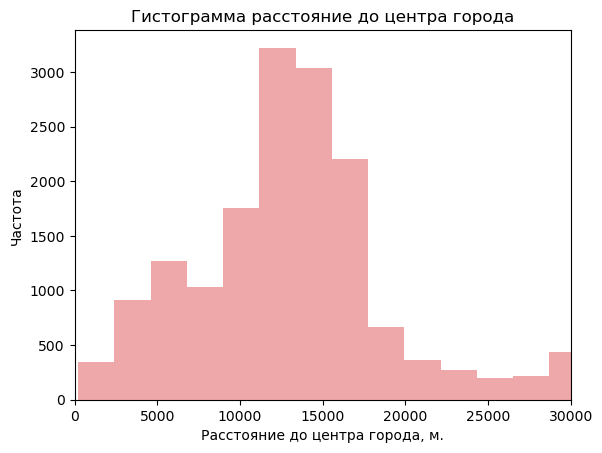

In [89]:
# Построим диаграмму для домов c расстоянием до центра города не более 30-и км.
sns.distplot(data['cityCenters_nearest'], kde=False, bins=30, color='tab:red')
plt.xlim(0, 30000)
plt.title('Гистограмма расстояние до центра города')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении расстояние до центра города:
1. 13 км - самая распространенная удаленность от центра города среди объектов недвижимости;
2. квартиры c удаленностью от центра от 9 до 66 км составляют основную массу квартир;
3. аномально большая удаленность от центра начинается с 27 километров.
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится примерно по центру ящика - показатель того, что данные относительно равномерны; усы длинные но примерно одинаковой длины, значит, данные имеют высокое стандартное отклонение и нет смещения к нижним или верхним значениям.

### Расстояние до ближайшего аэропорта

In [90]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('airports_nearest')

[0.0, 66123.0]

In [91]:
data['airports_nearest'].describe()

count    16986.00000
mean     28843.66025
std      12818.63197
min          0.00000
25%      18308.00000
50%      26956.50000
75%      37434.00000
max      84869.00000
Name: airports_nearest, dtype: float64

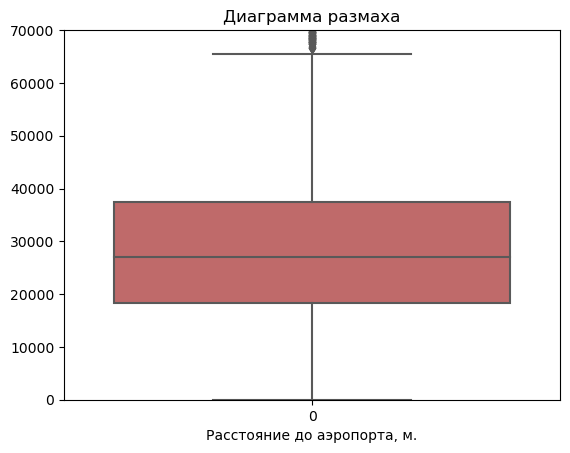

In [92]:
# построим диаграмму размаха, ограничив расстояние до аэропорта города 70 километрами.
sns.boxplot(data['airports_nearest'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до аэропорта, м.')
plt.ylim(0, 70000)
plt.show()

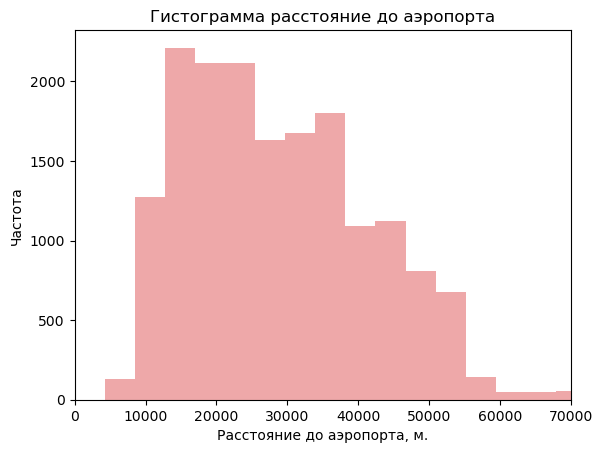

In [93]:
# Построим диаграмму для домов c расстоянием до аэропорта не более 70-и км.
sns.distplot(data['airports_nearest'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 70000)
plt.title('Гистограмма расстояние до аэропорта')
plt.xlabel('Расстояние до аэропорта, м.')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении расстояние до центра города:
1. 27 км - самая распространенная удаленность от аэропорта среди объектов недвижимости;
2. квартиры c удаленностью от аэропорта от 19 до 38 км составляют основную массу квартир;
3. аномально большая удаленность от центра начинается с 66 километров.
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится примерно по центру ящика - показатель того, что данные относительно равномерны; усы длинные но больше смещены вправо, значит, данные имеют высокое стандартное отклонение и смещение к значениям нижней границы.

### Расстояние до ближайшего парка

In [94]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('parks_nearest')

[1.0, 1106.5]

In [95]:
data['parks_nearest'].describe()

count    7321.000000
mean      494.723808
std       343.573915
min         1.000000
25%       289.000000
50%       458.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

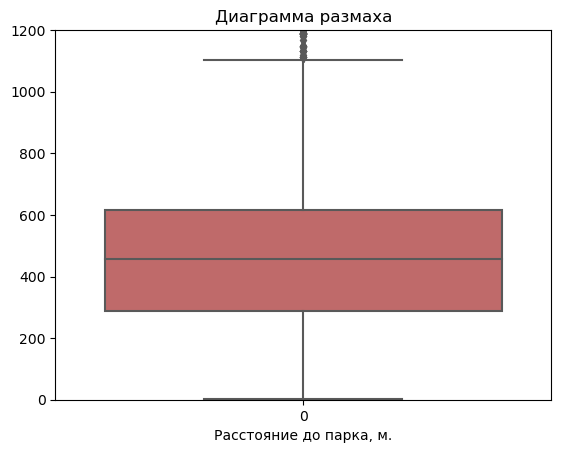

In [96]:
# построим диаграмму размаха, ограничив расстояние до ближайшего парка 1200 матрами.
sns.boxplot(data['parks_nearest'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до парка, м.')
plt.ylim(0, 1200)
plt.show()

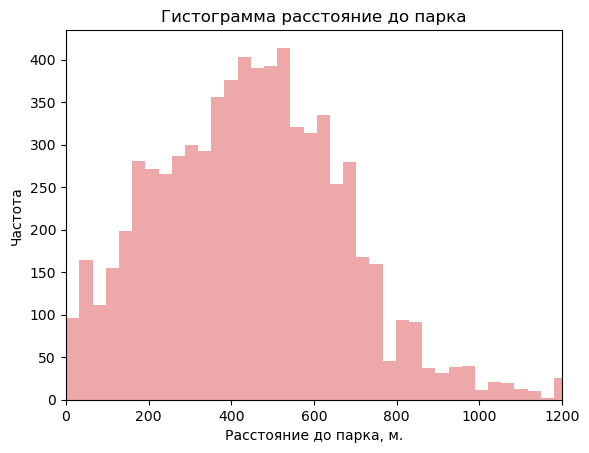

In [97]:
# Построим диаграмму для домов c расстоянием до ближайшего парка не более 1200 метров.
sns.distplot(data['parks_nearest'], kde=False, bins=100, color='tab:red')
plt.xlim(0,1200)
plt.title('Гистограмма расстояние до парка')
plt.xlabel('Расстояние до парка, м.')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении расстояние до ближайшего парка:
1. 460 м. - самая распространенная удаленность от ближайшего парка объектов недвижимости;
2. квартиры c удаленностью от парка на расстояние от 290 до 600 км составляют основную массу квартир;
3. аномально большая удаленность от парка начинается с 1,1 километра.
4. данные диаграммы размаха свидетельствуют о следующем:медиана находится по центру ящика - показатель того, что данные относительно равномерны; усы длинные но больше смещены вправо, значит, данные имеют высокое стандартное отклонение и смещение к значениям нижней границы.

### День и месяц публикации объявления

In [98]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('weekday')
# Где день недели с.

[0.0, 6.0]

In [99]:
det_whiskers('month')

[1.0, 12.0]

In [100]:
data['weekday'].describe()

count    22470.000000
mean         2.570093
std          1.791568
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [101]:
data['month'].describe()

count    22470.000000
mean         6.398353
std          3.491891
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

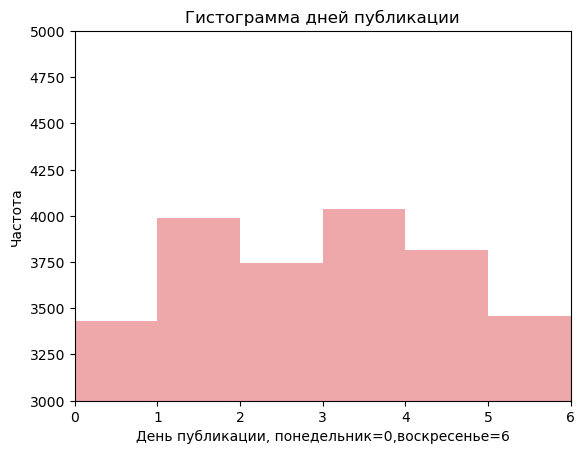

In [102]:
# Построим диаграмму по дням публикации.
sns.distplot(data['weekday'], kde=False, bins=6, color='tab:red')
plt.xlim(0,6)
plt.ylim(3000,5000)
plt.title('Гистограмма дней публикации')
plt.xlabel('День публикации, понедельник=0,воскресенье=6')
plt.ylabel('Частота')
plt.show()


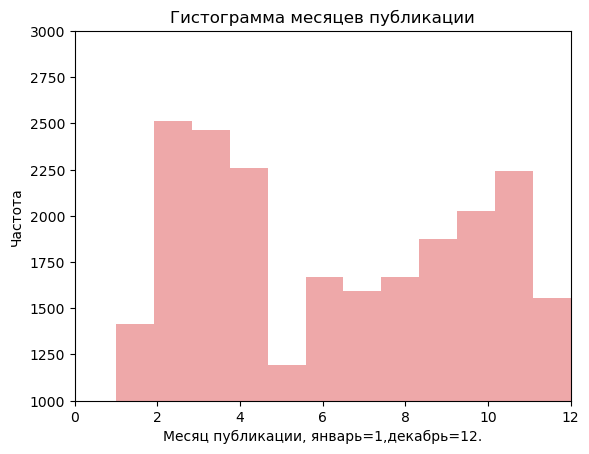

In [103]:
# Построим диаграмму по месяцам публикации.
sns.distplot(data['month'], kde=False, bins=12, color='tab:red')
plt.xlim(0,12)
plt.ylim(1000,3000)
plt.title('Гистограмма месяцев публикации')
plt.xlabel('Месяц публикации, январь=1,декабрь=12.')
plt.ylabel('Частота')
plt.show()

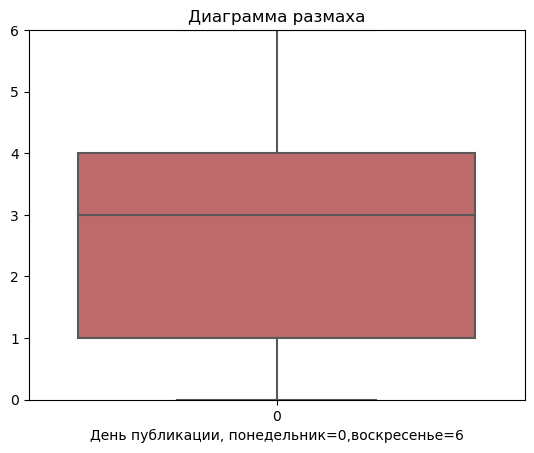

In [104]:
# построим диаграмму размаха по дням публикации.
sns.boxplot(data['weekday'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('День публикации, понедельник=0,воскресенье=6')
plt.ylim(0, 6)
plt.show()

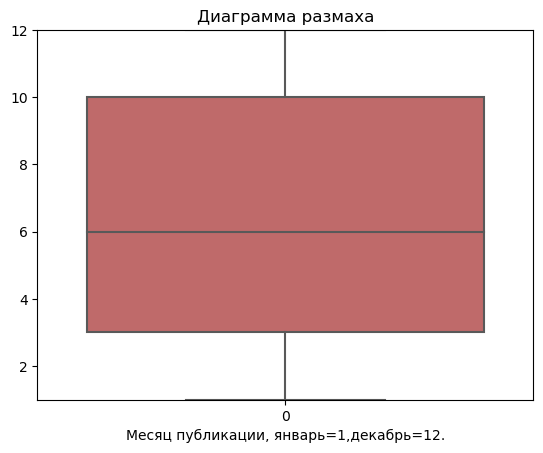

In [105]:
# построим диаграмму размаха по месяцу публикации.
sns.boxplot(data['month'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('Месяц публикации, январь=1,декабрь=12.')
plt.ylim(1, 12)
plt.show()

По представленным данным можно сделать следующие выводы в отношении дня и месяца публикации:
1. размещение объявления  в четверг в июле - самое популярное время размещения объявлений;
2. объявления о продаже квартир, в основном размещают со вторника по пятницу с марта по октябрь;
4. по распределению значений больше объявлений приходится на первое полугодие и вторую половину недели. Наблюдается сезонность в продажах - летом в июне прадажи квартир падают. 

На основании вех выше рассмотренных показателей можно сформировать образ самого распространенного объекта недвижимости на рынке:

2-х комнатная квартира жилой площадью 30 м.кв. и площадью кухни 9 м.кв. с высотой потолков 2,65 метров. Располагается на 4 этаже 9-и этажного дома в 13 км. от центра города, в 460 метрах от ближайшего парка и 27 километрах от аэропорта. Стоимость квартиры -4,6 млн.руб. Было опубликовано - в июле, в четверг.  


### Как быстро продавались квартиры (столбец days_exposition)

In [106]:
# Найдем нижнюю и верхнюю границы диапазона данных
det_whiskers('days_exposition')

[1.0, 415.0]

In [107]:
data['days_exposition'].describe()

count    22470.000000
mean       165.192746
std        201.469535
min          1.000000
25%         45.000000
50%         95.000000
75%        193.000000
max       1580.000000
Name: days_exposition, dtype: float64

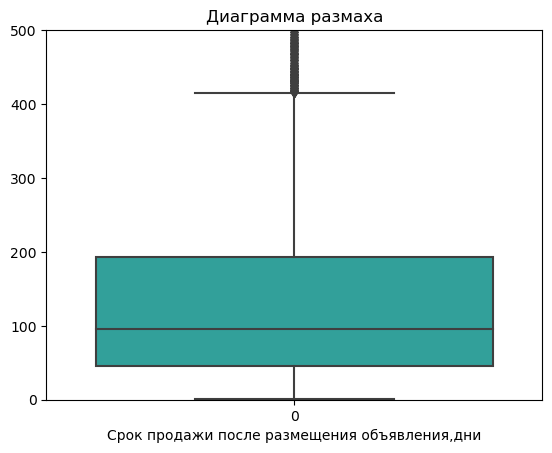

In [108]:
# построим диаграмму размаха, ограничив количеством дней, потребовавшихся для продажи, до 500 дней.
sns.boxplot(data['days_exposition'], color='lightseagreen')
plt.title('Диаграмма размаха')
plt.xlabel('Срок продажи после размещения объявления,дни')
plt.ylim(0, 500)
plt.show()

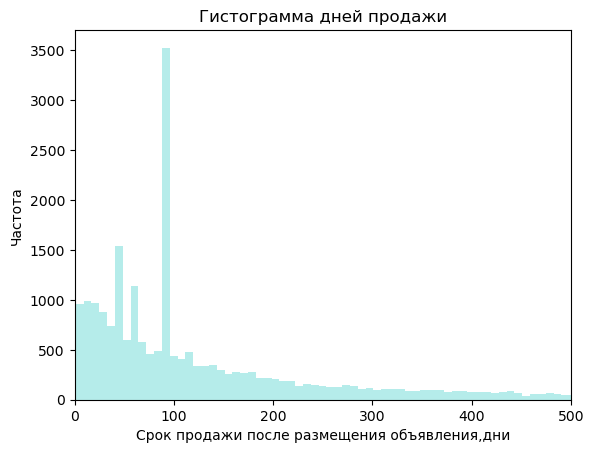

In [109]:
# Построим диаграмму для объектов на продажу которых, нпотребовалось до 500 дней.
sns.distplot(data['days_exposition'], kde=False, bins=200, color='mediumturquoise')
plt.xlim(0, 500)
plt.title('Гистограмма дней продажи')
plt.xlabel('Срок продажи после размещения объявления,дни')
plt.ylabel('Частота')
plt.show()

По представленным данным можно сделать следующие выводы в отношении этажа квартиры:
1. 95 дней - самый распространенный срок ожидания продажи;
2. в основном сроки продажи квартиры с момента размещения объявления колеблются от 45 до 193 дней.
3. аномально быстрая продажа (или удаление размещения объявления) происходит в 1-й день размещения. Аномально долгая продажа квартир наступает после 415 дней размещения объявления.
4. данные диаграммы размаха свидетельствуют о следующем:медиана смещена к левому краю ящика - показатель того, что данные неравномерны ; усы длинные справа - данные имеют высокое стандартное отклонение, есть смещение значений к нижним границам.
5. среднее значение - 165, медианное - 95. Эти значения отличаются существенно, что объясняется сильным разбросом значений.
 <font color='purple'>
6. видны аномалии на 45/60/90 дни, видимо, после этих сроков предлагается либо продлить размещение объявления о продаже, либо автоматически прекращается размещение объявления.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Необходимо изучить, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

Рассмотрение показателей: общая площадь; жилая площадь; площадь кухни.

In [110]:
# Создадим сводную таблицу для удобства дальнейшей работы
final_data = data[['last_price', 'total_area', 'living_area', 'kitchen_area']]
final_data

,last_price,total_area,living_area,kitchen_area
0,13000000,108.00,51.0,25.0
1,3350000,40.40,18.6,11.0
2,5196000,56.00,34.3,8.3
4,10000000,100.00,32.0,41.0
5,2890000,30.40,14.4,9.1
...,...,...,...,...
23693,4600000,62.40,40.0,8.0
23695,3100000,59.00,38.0,8.5
23696,2500000,56.70,29.7,10.5
23697,11475000,76.75,43.4,23.3


Выведем описательные статистики по столбцам — количество значений, среднее, стандартное отклонение (корень из дисперсии), минимум, квантили, максимум.

In [111]:
final_data.describe()

,last_price,total_area,living_area,kitchen_area
count,2.247000e+04,22470.000000,22470.000000,22470.000000
mean,5.365218e+06,54.730520,31.273482,9.863617
std,3.521018e+06,19.916276,13.622446,4.492163
min,1.219000e+04,12.000000,2.000000,0.000000
25%,3.380000e+06,39.500000,18.600000,7.000000
50%,4.500000e+06,50.400000,29.800000,9.000000
75%,6.320000e+06,66.000000,40.000000,11.300000
max,8.200000e+07,119.800000,101.000000,64.000000


Оценка матрицы корреляций значений в столбцах

In [112]:
final_data.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.689808,0.565815,0.543526
total_area,0.689808,1.000000,0.911625,0.538452
living_area,0.565815,0.911625,1.000000,0.260458
kitchen_area,0.543526,0.538452,0.260458,1.000000


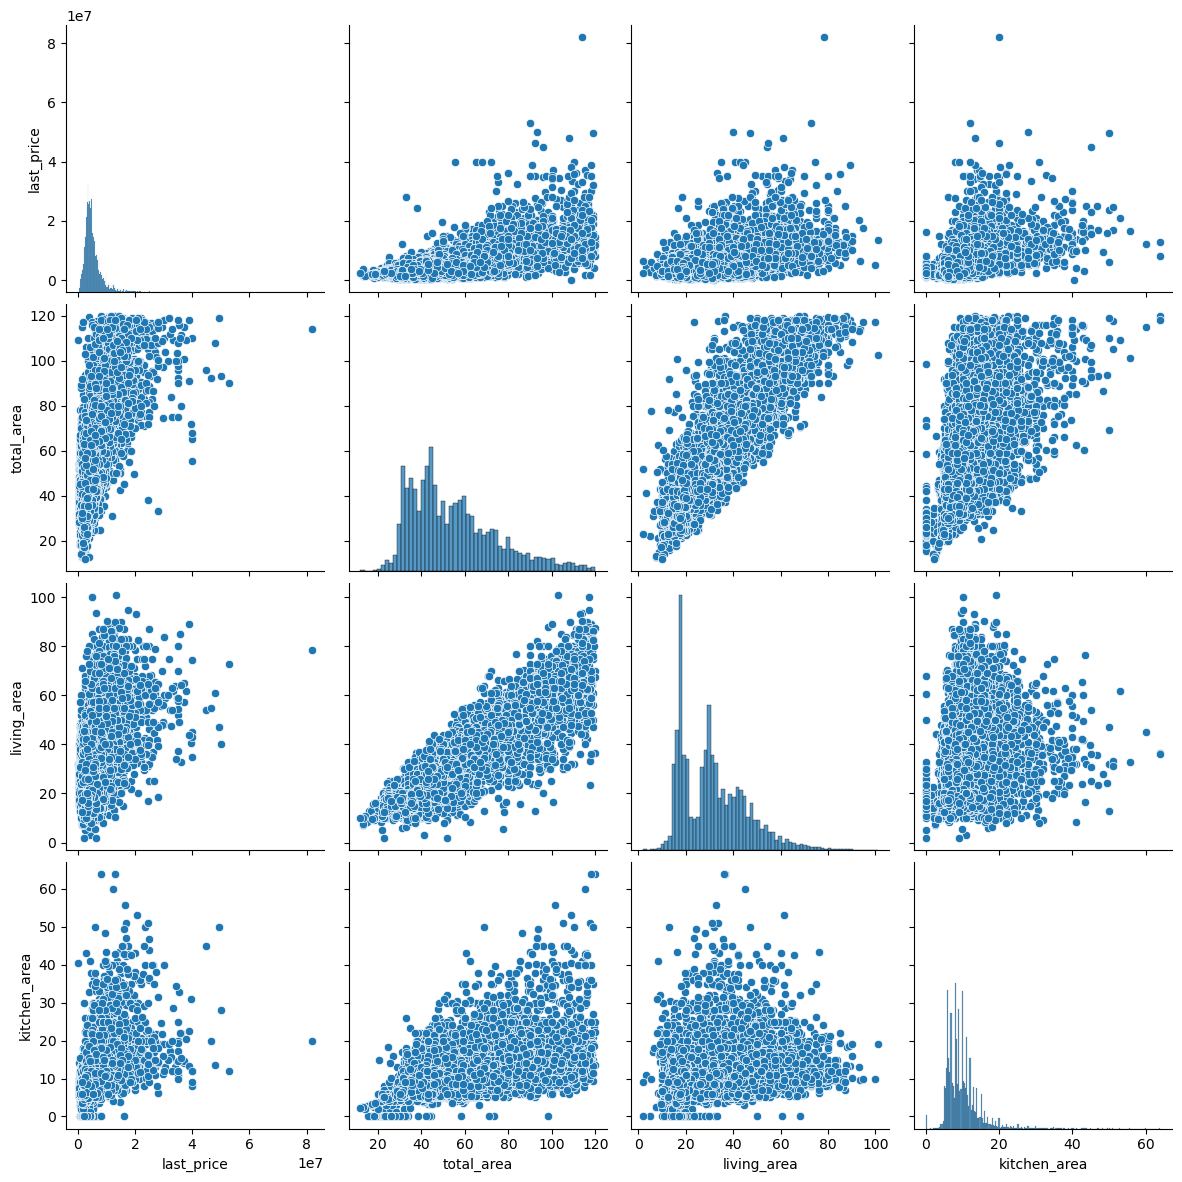

In [113]:
#Рассмотрим графики зависимостей
sns.pairplot(final_data,height=3)

Судя по значению коэффициента корреляции и диаграмам рассеяния, можно заключить следующее:
1. 0.689808  - коэффициент для зависимости стоимости жилья от общей площади. На графике рассеяния видна линейная зависимость, рассеяние,  выбросы. Тем не менее данная зависимость, среди рассмотреных - самая сильная.
2. 0.565815 - коэффициент для зависимости стоимости жилья от жилой площади. На графике рассеяния мы видим,что он не сильно отличается от предыдущего. Это объясняется тем, что значения общай площади и жилой линейно зависимы и хорошо коррелируются. Если есть зависимость стоимости с общай площадью,  то зависимость и с жилой площадью будет тоже. Зависимость стоимости от жилой площади - вторая по наличию зависимости пара показателей.
3. 0.543526 - коэффициент для зависимости стоимости жилья от площади кухни. Самая слабая из наблюдаемых зависимостей, но имеет место быть. В свою очередь присутствует зависимость площади кужни от жилой площади.

Рассмотрение показателей: этаж, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).

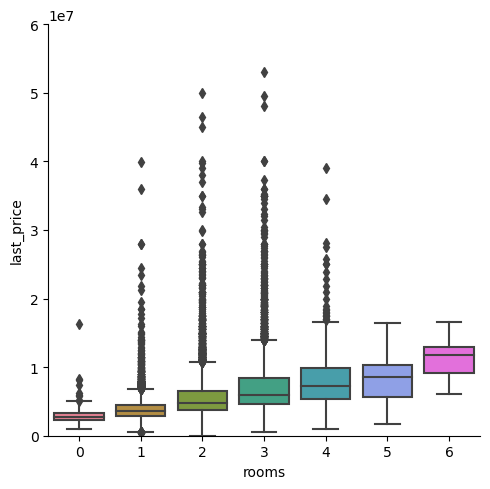

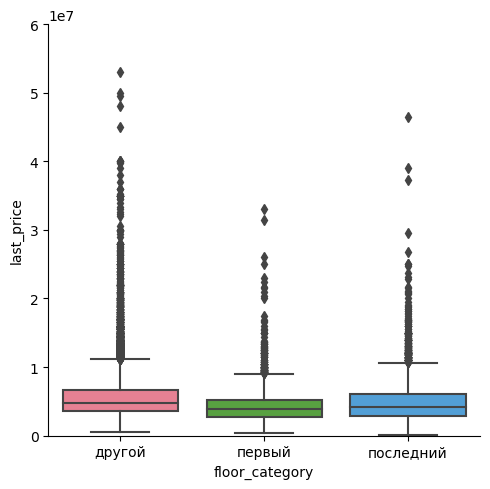

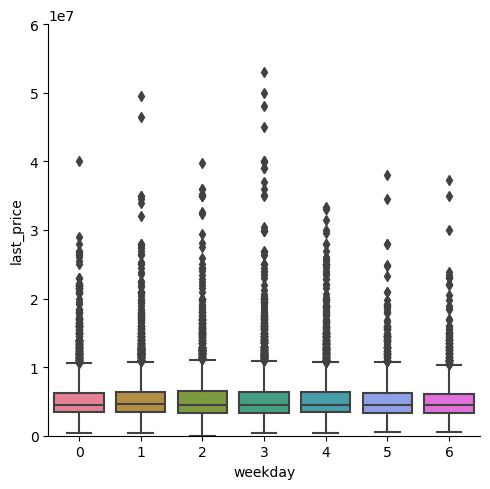

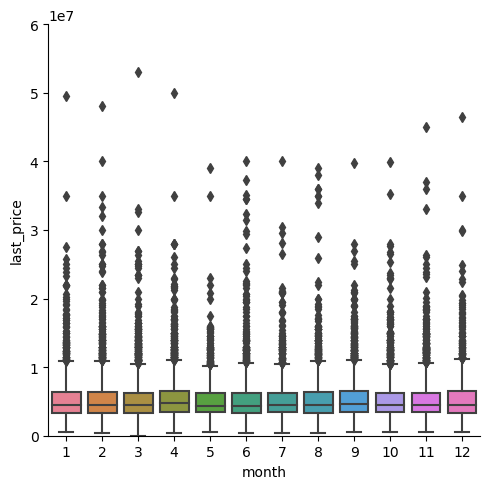

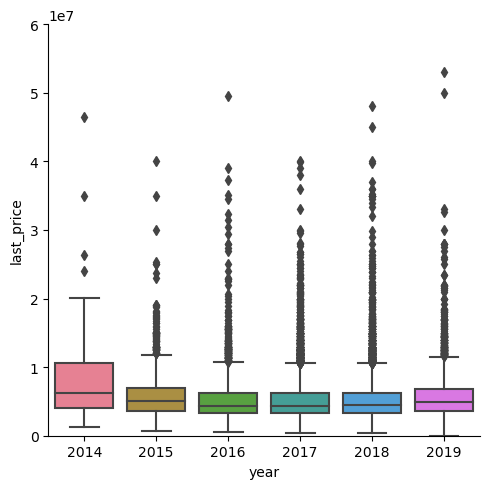

In [114]:
#Для визуализации категориальных графиков используем seaborn.catplot
for column in ['rooms','floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data, palette='husl')
    plt.ylim(0, 60000000)
plt.show()

При рассмотрении данных показателей заметили следующее:

1. cтоимость квартир напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает 9, далее видим спад стоимости жилья. Возможная причина -  отсутствием спроса.
2. квартиры на первом или последнем этаже продаются по более низкой цене, чем квартиры на других этажах.
3. день недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. 
4. квартиры продавались по более высоким ценам в 2014 году - с точки зрения экономической ситуации. Начиная с 2018г. наблюдается постепенный рост стоимости жилья.
5. видно, что самое высокое влияние на цену имеет площадь квартиры и ее характеристи (жилая площадь, стоимость квадратного метра, площадь кухни).

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Создадим сводную таблицу, содержащую  среднюю цену одного квадратного метра и отсортируем по числу объявлений для отображения 10 самых активных на рынке недвижимости  городов  в рассматриваемом регионе.

In [115]:
median_price = data.pivot_table(index='locality_name_short', values='price_per_sqm', aggfunc=['count', 'median'])
median_price.columns = ['count', 'median']
#median_price.sort_values('count', ascending=False).head(10)
median_price.sort_values('median', ascending=False).head(10)

,count,median
locality_name_short,,
санкт-петербург,14634,104000.000
зеленогорск,23,103333.330
сестрорецк,171,100000.000
пушкин,350,99678.545
левашово,1,96997.690
кудрово,470,95555.315
парголово,326,91780.225
мистолово,11,90888.890
стрельна,41,87741.940


Проанализировав данные можно отметить:
1. Санкт-Петербург является как городом с самым больим количеством объявлений о продаже недвижимости, в то же время и самые высокие медианные значения стоимости жилья наблюдаются в Санкт-Петербурге.
2. Количество объявлений значительно выше чем в других городах. Следует Санкт-Петербург рассмотреть внимательнее.

### Рассмотрим как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города

In [116]:
data['citycenters_km'] = round(data['cityCenters_nearest'] / 1000, 0)
data['citycenters_km'] = data['citycenters_km'].astype('int', errors='ignore')

In [117]:
data.loc[(data['locality_name_short'] == 'санкт-петербург') & (data['citycenters_km'].notna()),
         'citycenters_km'].apply(round)
spb_data = data.query('locality_name_short == "санкт-петербург"')
spb_center_nearest = spb_data.pivot_table(index='citycenters_km', 
                                          values=['price_per_sqm', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_sqm
citycenters_km,,
0.0,11500000,139318.890
1.0,9500000,126744.335
2.0,8990000,123966.940
3.0,7799000,110027.860
4.0,8275000,118257.575


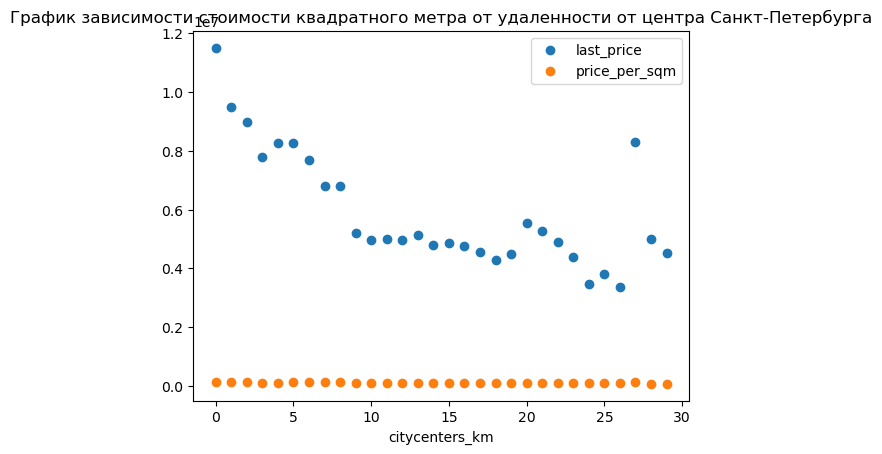

In [118]:
spb_center_nearest.plot(style='o', 
                        title = 'График зависимости стоимости квадратного метра от удаленности от центра Санкт-Петербурга')
plt.show()


Проанализировав данные можно сделать вывод:
1. Стоимость квадратного метра уменьшается с отдалением от центра Санкт-Петербурга.
2. Особенно велика стоимость жилья, расположенных в первых 5-и километрах от центра.

### Общий вывод

Был рассмотрен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов, который состоял из данные по 23699 объектам недвижимости. В 22-х колонках были описаны признаки объектов.


После ознакомления с данными, была проведена предобработка данных в результатекоторой были внесены следующие корректировки:
1. Устранены пропуски в столбцах:высота потолков - пропуски заполнены медианой значений этажности дома в зависимости от наименования населенного пункта, остальные значения заполнены медианой; число этажей в доме - строки с пропусками удалены, т.к. незначительное количество пропусков и отсутствует возможность соотнести с иными данными; жилая площадь - замены пропуски на среднее значение, т.к. существует четкая линейная взаимосвязь общей жилой площади и средней жилой площади; площадь кухни - пропущенные значения в квартирах-студиях заменены на нули "0", для остальных квартир заменины пропуски на средние значение; число балконов - пропущенные значения заменены на нули "0",предположили, что число балконов не заполнялось, если у квартиры не было балкона;название населённого пункта - пропуски удалены т.к. восстановить данные не предоставляется возможным; расстояние до центра города - заполнены медианой значений расстояния доцентра в зависимости от наименования населенного пункта, остальные пропущенные значения не меняли; апартаменты- пропуски заполнии путем указания "False", предположили, что данные не заполнялись, если квартира не являлась аппартаментами; расстояние до ближайшего аэропорта- заполнены медианой значений расстояния до аэропорта в зависимости от наименования населенного пункта, остальные пропущенные значения не меняли,; число парков в радиусе 3 км., расстояние до ближайшего парка, число водоемов в радиусе 3 км., расстояние до ближай шего водоема - количество пропусков в данных значительное. Пропуски не были заполнены , т.к. не представляется возможным заполнение из-за отсутствия данных; длительность размещения объявления (от публикации до снятия) - заполнили пропуски медианными значениями. 
2. Проведена замена типа данных в колонках:этажи, количество балконов, количество дней размещения объявления, цена на момент снятия с публикации - на целые числа;тип данных по дате публикации  -  переведен в читабельный тип datetime.
3. Устранение неявных дубликатов в названиях населённых пунктов позволило сократить число уникальных значений с 364 до 309.
4. Устранены редкие и выбивающиеся значения в колонках:высоту потолков - удалены значения(1.0, 1.2, 100.0(м)), заменили значения более 20 разделены на 10 и цифры приведены к более реальным значениям; общая площадь квартиры -  значения более 120 м.кв удалены; число комнат - более 7 удалены.

В результате проделанной работы количество объектов недвижмости для анализа сократилось до 22470.

Для проведения исследовательского анализа таблица была дополнена новыми столбцами со следующими параметрами:
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Был проведен исследовательский анализ данных:
1. жилой площади - 30 м.кв. - самая распространенная жилая площадь квартир, квартиры с жилой площадью от 19 до 40 м.кв. составляют основную массу квартир, аномально низкие и аномально высокие жилые площади - до 2 и от 72 м.кв. соответственно;
2. площадь кухни - 9 м.кв. - такая площадь кухни самая распространенная, основная масса квартир включает кухни с площадью от 7 до 11 м.кв., аномально высокие значения площади кухни начинаются от 18 м.кв.;
3. цена объекта - 4,5 млн.руб. - самая распространенная цена объектов недвижимости,квартиры со стоимостью от 3,4 млн.рублей до 6,3 млн.рублей составляют основную массу квартир, аномально низкие и аномально высокие цены - до 12 тыс.рублей и от 11 млн.рублей соответственно;
4. количество комнат - 2-х комнатная квартира - самая распространенная среди объектов недвижимости, квартиры с количеством комнат от 1 до 3-х составляют основную массу квартир, аномально большое количество комнат начинается с 6 штук;
5. высота потолков- 2,65 метров - самая распространенная высота потолков среди объектов недвижимости,квартиры c высотой потолков от 2,60 до 2,70 метров составляют основную массу квартир, аномально большая высота потолков начинается с высоты более 2,85 метров;
6. этаж квартиры - 4 этаж - самый распространенный этаж среди объектов недвижимости, квартиры, находящиеся со 2 по 8 этажи, составляют основную массу квартир, аномально большой номер этажа начинается с 17 этажа;
7. тип этажа квартиры («первый», «последний», «другой») - максимальное количество квартир относится к категории "другой" этаж, меньше всего - количество квартир в категории "первый" этаж;
8. общее количество этажей в доме - 9 этажный дом - самый распространенный по высоте объектов недвижимости, квартиры, находящиеся в домах с этажностью от 5 до 16 этажей, составляют основную массу квартир,аномально высотные дома начинается с 33 этажа;
9. расстояние до центра города в метрах - 13 км. - самая распространенная удаленность от центра города среди объектов недвижимости, квартиры c удаленностью от центра от 10 до 16 км составляют основную массу квартир, аномально большая удаленность от центра начинается с 26 километров;
10. расстояние до ближайшего аэропорта - 27 км - самая распространенная удаленность от аэропорта среди объектов недвижимости, квартиры c удаленностью от аэропорта от 18 до 37 км составляют основную массу квартир, аномально большая удаленность от центра начинается с 66 километров;
11. расстояние до ближайшего парка - 458 м. - самая распространенная удаленность от ближайшего парка объектов недвижимости, квартиры c удаленностью от парка на расстояние от 289 до 616 км составляют основную массу квартир,аномально большая удаленность от парка начинается с  1,1 километра;
12. день и месяц публикации объявления - объявления размещение объявления в четверг и в июле - самое популярное время размещения объявлений, объявления о продаже квартир, в основном размещают со вторника по пятницу и с марта по октябрь. Наблюдается сезонность - в июне продажи падают;
13. Как быстро продавались квартиры (столбец days_exposition) - 95 дней - самый распространенный срок ожидания продажи,в основном сроки продажи квартиры с момента размещения объявления колеблются от 45 до 193 дней, аномально быстрая продажа (или удаление размещения объявления) происходит в 1-й день размещения. Аномально долгая продажа квартир наступает после 415 дней размещения объявления.

Были установлены факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [119]:
median_price.sort_values('median',ascending=False).head(10)

,count,median
locality_name_short,,
санкт-петербург,14634,104000.000
зеленогорск,23,103333.330
сестрорецк,171,100000.000
пушкин,350,99678.545
левашово,1,96997.690
кудрово,470,95555.315
парголово,326,91780.225
мистолово,11,90888.890
стрельна,41,87741.940


Санкт-Петербург является как городом с самым больим количеством объявлений о продаже недвижимости, в то же время и самые высокие медианные значения стоимости жилья наблюдаются в Санкт-Петербурге.

Установлено, что стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города:

In [120]:
spb_center_nearest.head(10)

,last_price,price_per_sqm
citycenters_km,,
0.0,11500000,139318.890
1.0,9500000,126744.335
2.0,8990000,123966.940
3.0,7799000,110027.860
4.0,8275000,118257.575
5.0,8250000,126927.640
6.0,7700000,124531.880
7.0,6800000,121022.725
8.0,6800000,120267.720


Стоимость квадратного метра уменьшается с отдалением от центра Санкт-Петербурга.


Так выглядит корреляция стоимости квартир и признаков.

In [121]:
(data
 .corr()['last_price']
 .to_frame()
 .sort_values('last_price', ascending=False)
 .style
 .background_gradient(cmap="Purples")
)

,last_price
last_price,1.000000
price_per_sqm,0.760362
total_area,0.689808
living_area,0.565815
kitchen_area,0.543526
rooms,0.390898
ceiling_height,0.283637
ponds_around3000,0.195606
parks_around3000,0.180128
total_images,0.154471



Определены показатели, которые больше всего на стоимость объектов недвижимости:

1. стоимость квадратного метра, на которую влияет удаленость от центра города;
2. общая площадь , т.к. видна линейная зависимость: с ростом общей площади увеличивается и стоимость квартиры. Жилая площадь, влияет на стоимость, так как напрямую зависит от общей площади;
3. cтоимость квартир напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает 4, далее видим спад стоимости жилья. Возможная причина - отсутствием спроса;
5. квартиры на первом или последнем этаже продаются по более низкой цене, чем квартиры на других этажах;
6. день недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан;
7. квартиры продавались по более высоким ценам в 2014 году - с точки зрения экономической ситуации. Начиная с 2018г. наблюдается постепенный рост стоимости жилья.



Для определения рыночной стоимости объектов недвижимости в будующем важно настроить ограничения ввода данных пользователем:
1. Ограничить возможность ручного ввода данных - ввести категории выбора;
2. Ввести ограничения по минимальным и максимальным значениям;
3. Для указания расстояний и местоположений настроить подсчет данных с использованием координат;
4. Сделать обязательным заполнение всех полей;
5. Описать алгоритм снятия с публикации объявлений размещенных довольно долгий период(годами) и порядок действий для объявлений закрытых в течение 1 суток(скорее всего это ошибочные объявления и от них необходимо избавляться).